# 4.2 Das NaSch-Modell

Wie bereits im letzten Kapitel angekündigt, wollen wir hier nun das sogenannte [Nagel-Schreckenberg-Modell (NaSch-Modell)](https://en.wikipedia.org/wiki/Nagel%E2%80%93Schreckenberg_model) grob nachbauen. Das Modell soll die Entstehung von sogenannten *Staus aus dem Nichts*, bei denen es eigentlich gar kein offensichtliches Hindernis, wie einen Unfall oder eine Baustelle gibt, erklären. Laut dem Modell würde es stattdessen bereits ausreichen, wenn auf einer ausreichend vollen Straße Menschen einfach ab und zu leicht bremesen d.h. ihre Geschwindigkeit nicht konstant aufrecht erhalten. Das würde dazu führen, dass auch die nachfolgenden Autos bremsen müssten und danach einige Zeit bräuchten, um wieder die Normalgeschwindigkeit zu erreichen. Genau dadurch müssen aber die darauf folgenden Autos noch ein bisschen mehr bremsen und dadurch auch wieder die danach kommenden Autos - bis sich das kollektive Bremsen zu einem Stau hochgeschaukelt hat, obwohl es letztlich gar kein stehendes Hindernis oder nicht mal eine Verengung der Straße gab. Es entsteht letztlich das *kollektive Phänomen Stau* als unbeabsichtigte Folge der individuellen, aufeinanderbezogenen Handlungen der Autofahrer\*innen. Dieses kollektive Phänomen des Staus aus dem Nichts weist dabei interessanterweise die Form einer sogenannten Stau-Welle auf: Die Position des Staus verschiebt sich entlang der Straße entgegen die Fahrtrichtung.

Auf Youtube findet man zahlreiche Videos, die das Phänomen behandeln und in denen auch nicht selten einer der Erfinder des NaSch-Modells zu Wort kommen:

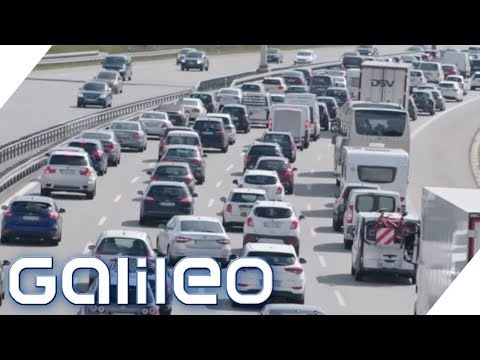

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("V5s2T45nCGY") 

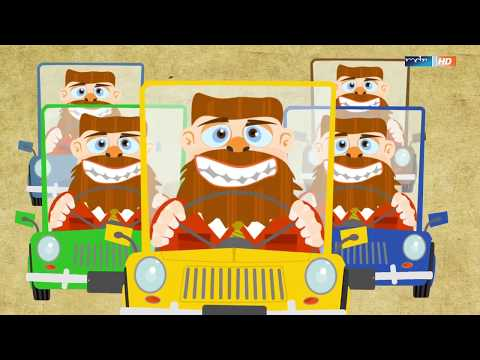

In [2]:
YouTubeVideo("FVN7QMducUc")

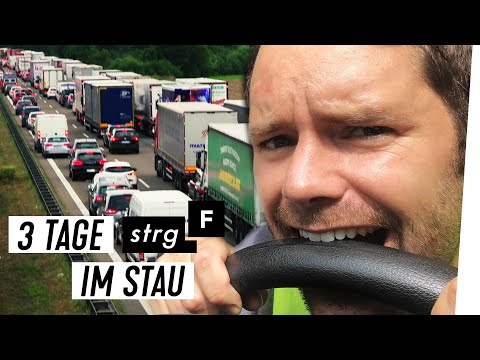

In [3]:
YouTubeVideo("b5F8LLSoTFs")

So wie die "Simulation" im letzten Kapitel können wir auch das NaSch-Modell mit unseren aktuell zu Verfügung stehenden Mitteln darstellen. In den frühen Artikeln zum NaSch-Modell machen das Nagel und Schreckenberg sogar selbst ganz ähnlich. Die Graphik unten ist ein Ausschnitt aus einem [Artikel zum NaSch-Modell](https://www.researchgate.net/publication/263504490_A_cellular_automaton_model_for_freeway_traffic). Jede Zeile stellt den Zustand der Straße zu einem Zeitpunkt dar. Die Punkte stellen leere Straßenpositionen dar. Die Zahlen stellen die Autos dar, wobei der Zahlenwert für die zu dem Zeitpunkt gefahrene Geschwindigkeit steht. Die Autos fahren dabei nach rechts. Eine solche Form der graphischen Darstellen streben wir diesmal auch an.

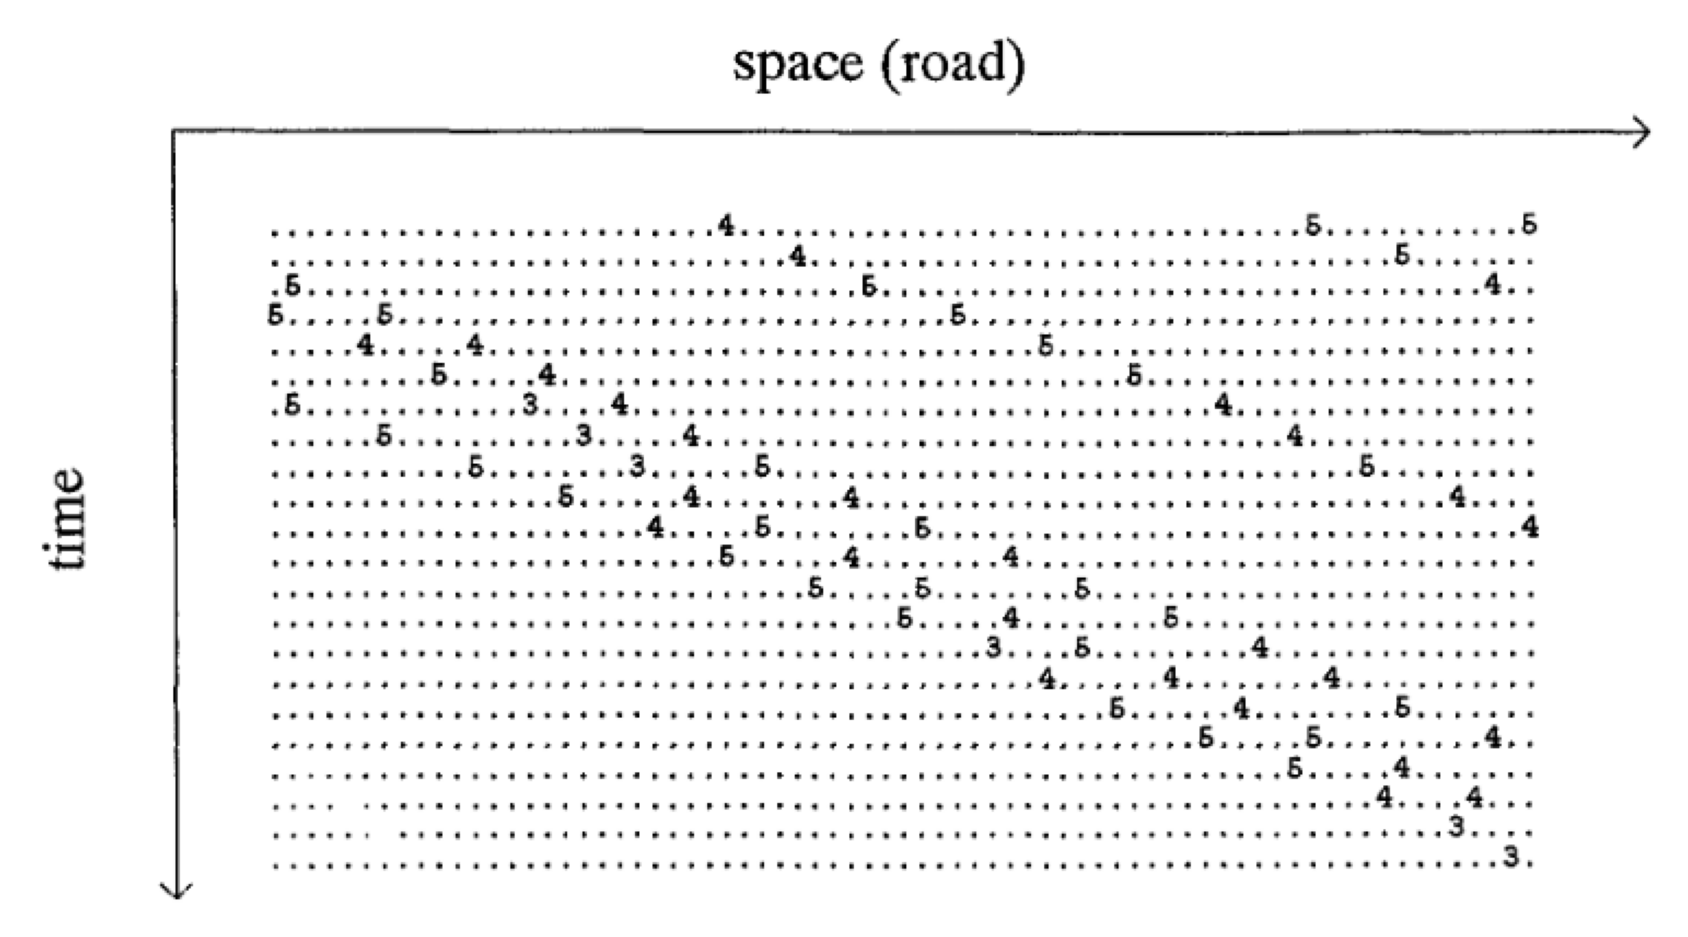

In [4]:
import src
src.plt_image('img/NaSch-Modell1.png')

**Quelle:** Nagel K and Schreckenberg M 1992J. Phys. I22221. [Link](https://www.researchgate.net/publication/263504490_A_cellular_automaton_model_for_freeway_traffic)

Die nächste Graphik zeigt, wie ein Stau in einer solchen Darstellungsform aussieht. Es sammeln sich mehrere Autos mit einer Geschwindigkeit von 0. Und man sieht zudem, wie sich die Stau-Welle im Zeitverlauf nach links bewegt, während die Autos nach rechts fahren.

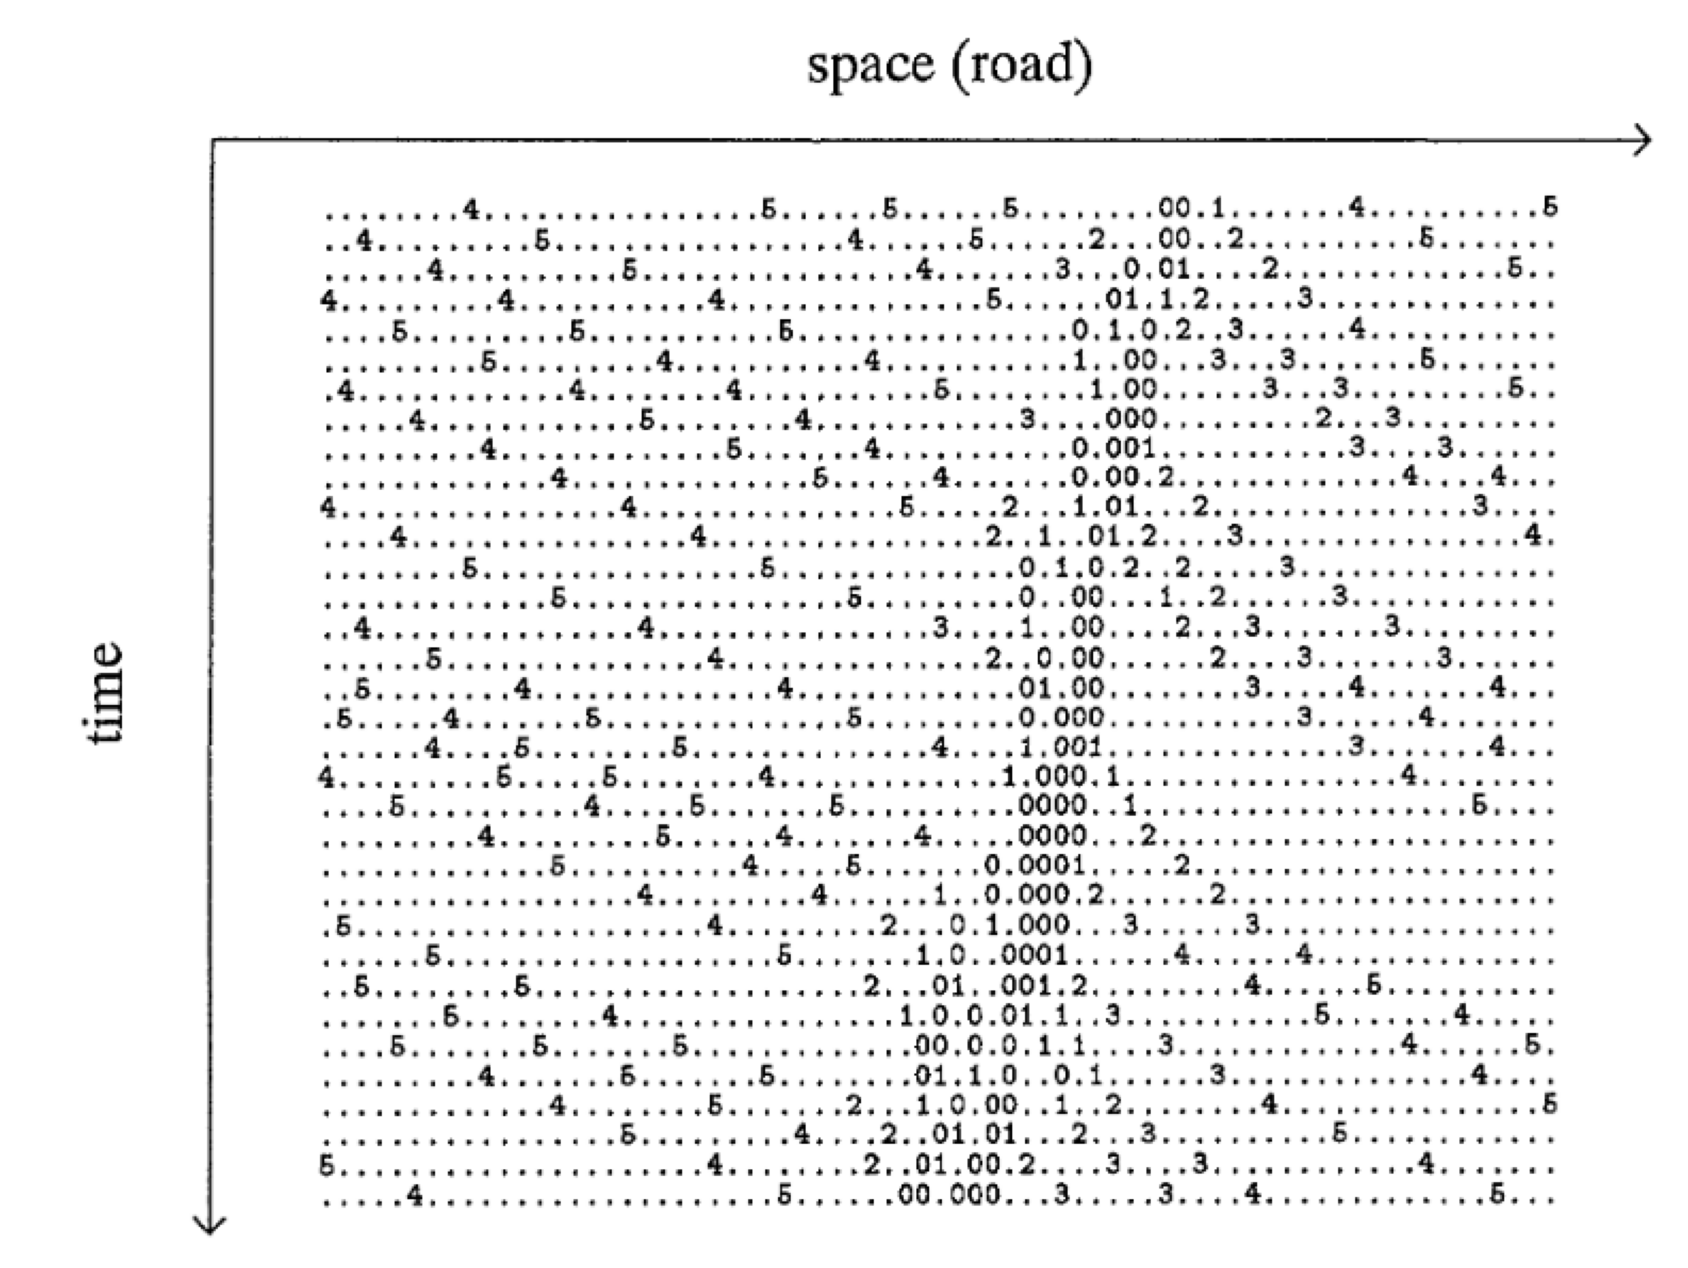

In [5]:
src.plt_image('img/NaSch-Modell2.png')

**Quelle:** Nagel K and Schreckenberg M 1992J. Phys. I22221. [Link](https://www.researchgate.net/publication/263504490_A_cellular_automaton_model_for_freeway_traffic)

Im Folgenden eine recht gute Zusammenfassung des Modells von [Wikipedia](https://en.wikipedia.org/wiki/Nagel%E2%80%93Schreckenberg_model#Outline_of_the_model):

>*In the Nagel–Schreckenberg model, a road is divided into cells. In the original model, these cells are aligned in a single row whose ends are connected so that all cells make up a circle (this is an example of what are called periodic boundary conditions). Each cell is either empty road or contains a single car; i.e., no more than one car can occupy a cell at any time. Each car is assigned a velocity which is an integer between 0 and a maximum velocity (= 5 in Nagel and Schreckenberg's original work).*

>*Time is discretized into time steps. This discretization in both space and time results in a cellular automaton. One can think of a cell as being a few car lengths long and the maximum velocity as being the speed limit on the road. The time step is then the time taken for a car at the speed limit to travel around 10 car lengths. However, the model can also be thought as just a way to understand or to model features of traffic jams by showing how interactions between nearby cars cause the cars to slow down. In each time step, the procedure is as follows.*

>*In each step, the following four actions are conducted in order from first to last, and all are applied to all cars. In each action the updates are applied to all cars in parallel.*

>1. *Acceleration: All cars not at the maximum velocity have their velocity increased by one unit. For example, if the velocity is 4 it is increased to 5.*

>2. *Slowing down: All cars are checked to see if the distance between it and the car in front (in units of cells) is smaller than its current velocity (which has units of cells per time step). If the distance is smaller than the velocity, the velocity is reduced to the number of empty cells in front of the car – to avoid a collision. For example, if the velocity of a car is now 5, but there are only 3 free cells in front of it, with the fourth cell occupied by another car, the car velocity is reduced to 3.*

>3. *Randomization: The speed of all cars that have a velocity of at least 1, is now reduced by one unit with a probability of p. For example, if p = 0.5, then if the velocity is 4, it is reduced to 3 50% of the time.*

>4. *Car motion: Finally, all cars are moved forward the number of cells equal to their velocity. For example, if the velocity is 3, the car is moved forward 3 cells.*

>*These four actions are repeated many times, as long as is required to study any traffic jams that may form. The model is an example of a cellular automaton. The model is for a single lane where cars cannot pass each other; there is no overtaking.*


**Quelle: Wikipedia** https://en.wikipedia.org/wiki/Nagel%E2%80%93Schreckenberg_model

## Aufgabe 1

Einen großen Teil des Codes für das Modell findest du bereits unten. Deine Aufgabe ist es am dieser Stelle dir den Code anzuschauen und in Kombination mit den nun folgenden Beschreibungen des Codes so gut es geht nachzuvollziehen. In der nächsten Aufgabe sollst du dann den noch fehlenden Code ergänzen.

Den Code des Modells kann man grob in 6 Teile untergliedern:

1. Import von zusätzlichen Modulen
2. Definition wichtiger Parameter der Simulation
3. Erstellen der Population
4. Starten der Simulation mittels For-Loop durch die Zeit
5. Grafische Darstellung der Simulation
6. Handeln der Agenten


#### Schritt 1 - Import von zusätzlichen Modulen

Zu Beginn eines jeden Python-Programmes müssen die zusätzlichen Module, die wir benötigen, importiert werden. In diesem Fall wird das Modul `random` aus der Standard-Bibliothek importiert. Wir brauchen das Modul `random` später, um das zufällige Trödeln der Agenten einzubauen.

#### Schritt 2 - Definition wichtiger Parameter der Simulation

An dieser Stelle werden wichtige Parameter unserer unserer Simulation definiert. Wir können hier als Parameter all diejenigen Werte verstehen, die das allgemeine "Verhalten" unserer Simulation beeinflussen. Ich schreibe übrigens die Variablennamen der Parameter alle bewusst groß, da es in der Informatik eine Konvention gibt, Variablen, deren Werte sich im gesamten Verlauf des Programmes nicht verändert, groß zu schreiben. Eine solche Variable nennt man auch Konstante.

- `TICKS`: Dies ist die Anzahl der simulierten Zeitschritte. In jedem Zeitschritt "wiederholt" sich der gesamte Ablauf der eigentlichen Simulation einmal.


- `MAX_SPEED`: Dies ist Höchstgeschwindigkeit der Agenten. Die Geschwindigkeit ist definiert als Anzahl der "Zellen" bzw. Straßenabschnitte sich ein Agent pro Zeitschritt nach vorne bewegt.


- `DAWDLING_PROB`: Gibt die Wahrscheinlichkeit pro Zeitschritt an, zu *trödeln* d.h. die Geschwindigkeit ohne Grund um eine Einheit zu reduzieren.


- `N_AGENTS`: Anzahl der Agenten in der Population.


- `INITIAL_DISTANCE`: Die Agenten werden am Anfang mit gleichmäßigem Abstand zueinander auf der Straße verteilt. Diese Variable gibt die anfängliche Distanz von Agent zu Agent an.


- `STREET_LEN`: Die Länge der Straße bzw. die Anzahl an Straßenabschnitten (Zellen) der Straße, welche von den Agenten befahren werden können. Diese ergibt sich aus der Anzahl der Agenten und deren anfängliche Distanz zueinander.

#### Schritt 3 - Erstellen der Population

Wie so oft wird zunächst eine leere Liste `population` erstellt, welche dann in einem For-Loop nach und nach mit Agenten befüllt wird.

Die Eigenschaften der Agenten repräsentieren wir diesmal als ein Dictionary. Das vereinfacht uns vieles. Z.B. können wir die einzelnen Eigenchaften der Agenten benennen und dann auch mit Namen auf diese zugreifen. Genau wie Listen sind Dictionaries gehören Dictionaries zu den veränderbaren Datentypen. Dadurch können wir sehr einfach die Eigenschaften der Agenten (z.B. innerhalb von For-Loops) verändern.

In einem ersten For-Loop erstelle ich jeden Agenten zunächst mit vier Eigenschaften und hänge diese an die Liste `population`.
- `"id"`: Ist eine Zahl zur eindeutigen Identifikation der Agenten. Diese brauchen wir in diesmal noch nicht unbedingt, dennoch kann eine solche ID hilfreich beim Test des Modells/Codes sein. Da ich als ID einfach den Wert der Schleifenvariable `i` einsetze, entspricht die `"id"` in diesem Fall auch der Position des Agenten innerhalb der Liste `population` (ACHTUNG: Nicht mit der Position auf der Straße verwechseln!). Diese Eigenschaft der `"id"` können wir tatsächlich doch auch schon diesmal gebrauchen.


- `"position"`: Ist die aktuelle Position des Agenten auf der Straße. Am Anfang ergibt sich die Position auf der Straße aus der Position in der Liste `population` multipliziert mit der anfänglichen Distanz von Agent zu Agent.


- `"speed"`: Ist die aktuelle Geschwindigkeit des Agenten definiert als Straßenabschnitte, die sich ein Agent pro Zeitabschnitt nach vorne bewegt. Ich setze diese hier anfänglich auf die maximal fahrbare Geschwindigkeit.


- `"space_ahead"`: Das ist die Anzahl der freien d.h. befahrbaren Straßenabschnitte vor dem Agenten bis der nächste Agent auf der Straße kommt. Die Anzahl der freien Straßenabschnitte vor einem Agent ist immer um 1 kleiner als die Distanz zum vorausfahrenden Agenten. Am Anfang ergibt sich der Freiraum vorm Agenten daher als `INITIAL_DISTANCE - 1`.

Nachdem nun die Population erstellt wurde, füge ich nochmal zwei Eigenschaften zu jedem Agenten hinzufügen: den jeweils vorausfahrenden Agenten und den jeweils hinterherfahrenden Agenten. Da in unserer Simulation nicht überholt werden kann, sind dies immer die selben zwei Agenten. Um später die *Interaktion* zwischen den Agenten bzw. die Reaktionen der Agenten aufeinander zu modellieren, ist es praktisch, wenn sich alle Agenten merken, wer vor oder hinter dem Agenten fährt. Tatsächlich speichern wir dabei nicht eine *Kopie* der jeweiligen voraus- oder nachfahrenden Agenten selbst ein, sondern nur *Verweise* bzw. *Zeiger* auf die jeweiligen Agenten-Objekte. Das ist sehr praktisch, weil wir so über einen Agenten immer auch auf den jeweils voraus- oder hinterherfahrenden Agenten zugreifen können und diesen verändern können (da die Agenten als veränderbare Dictionaries repräsentiert sind)! Auf jeden Agenten wird nun also einmal in der Liste `population`, aber auch einmal innerhalb eines anderen Agenten als vorausfahrender Agent und einmal innerhalb eines anderen Agenten als nachfahrender Agent verwiesen.

Die voraus- und nachfahrenden Agenten werden unter `"agent_ahead"` und `"agent_behind"` als Eigenschaft eines jeden Agenten eingespeichert. Versuche mal nachzuvollziehen, wie die beiden Agenten jeweils gefunden werden. Wenn dir das nicht 100% klar ist, ist das aber nicht so schlimm. Merken solltest du dir v.a., dass sich unter dem Dictionary-Key `"agent_ahead"` der vorausfahrende und unter dem Dictionary-Key `"agent_behind"` jeweils der hinterherfahrende Agent befindet.


#### Schritt 4 - Das Starten der Simulation mittels For-Loop durch die Zeit

Nach der obigen *Initialisierungsphase* wird nun die eigentliche Simulation gestartet. Mittels For-Loop wird jeder nun nachfolgende, eingerückte Code für jeden zu simulierenden Zeitschritt wiederholt. In jedem Zeitschritt wird die grafische Darstellung aktualisiert und ausgegeben sowie jeder Agent zum handeln gebracht.


#### Schritt 5 - Die grafische Darstellung der Simulation

An dieser Stelle wird die sehr simple grafische Darstellung des Modells erstellt. Diese ist vom Prinzip her genau gleich wie die grafische Darstellung in den Übungsaufgaben des letzten Kapitels. Diesmal werden leere Straßenabschnitte allerdings als `"."` und Agenten als Zahl, die die aktuelle Geschwindigkeit anzeigt, dargestellt.


#### Schritt 6 - Das Handeln der Agenten

In diesem Schritt Handeln die Agenten. Hier ist es dann gleich deine Aufgabe, die noch fehlende Umsetzung der vier [Handlungsregeln der Agenten](https://en.wikipedia.org/wiki/Nagel%E2%80%93Schreckenberg_model#Outline_of_the_model) zu programmieren. Einen Teil, welcher nicht direkt in den 4 Handlungsregeln besprochen wird, habe ich aber auch hier bereits vorgegeben. In diesem von mir bereits vorgegebenen Teil geht es darum, dass nachdem die Agenten entsprechend der 4 Handlungsregeln gehandelt haben, nochmal alle Agenten durchgegangen werden, um ihre "Sicht" auf die Straße zu aktualisieren. Da die Agenten gefahren sind, hat sich evtl. der Abstand zum vorausfahrenden (und zum nachfahrenden Agenten) verändert. Diese Information müssen wir natürlich den Agenten mitteilen, damit sie im nächsten Zeitschritt ein richtiges *Abbild* der Straße *im Kopf* haben.

In [6]:
### Schritt 1: Import von zusätzlichen Modulen ###
import random 


### Schritt 2: Definition wichtiger Parameter der Simulation ###

TICKS = 10
MAX_SPEED = 5 
DAWDLING_PROB = 0.1 
N_AGENTS = 20 
INITIAL_DISTANCE = 5 
STREET_LEN = N_AGENTS * INITIAL_DISTANCE


### Schritt 3: Das Erstellen der Population ###

# Leere Liste, die gleich mit Agenten befüllt wird
population = []

# für jeden zu erstellenden Agenten
for i in range(N_AGENTS):
    
    # Agent als Dictionary erstellen
    agent = {
        "id": i,
        "position": i * INITIAL_DISTANCE,
        "speed": MAX_SPEED,
        "space_ahead": INITIAL_DISTANCE - 1,
    }
    
    # Agent an die Populationsliste hängen
    population.append(agent)

    
# Population nochmal überarbeiten - jeweils vorausfahrende und nachfahrende Agenten einspeichern
# für jeden Agenten in Population
for agent in population:
    # den vorausfahrenden Agenten merken/als Eigenschaft einspeichern
    agent.update({"agent_ahead": population[(agent["id"]+1)%len(population)]})
    
    # den nachfahrenden Agenten merken/als Eigenschaft einspeichern
    agent.update({"agent_behind": population[(agent["id"]-1)%len(population)]})
                 

        
### Schritt 4: Das Starten der Simulation mittels For-Loop durch die Zeit ###

# für jeden Zeitschritt
for tick in range(TICKS):
    
    ### Schritt 5: Die grafische Darstellung der Simulation ###
    
    # "leere" Straße als String von Punkten erstellen
    street_as_list = []
    for i in range(STREET_LEN):
        street_as_list.append(".")
        
    # für jeden Agenten
    for agent in population:
        # Agenten auf entsprechender Position auf Straße einfügen
        # Agent wird in diesem Fall als dessen Geschwindigkeit repräsentiert
        street_as_list[agent["position"]] = str(agent["speed"])
    
    # Repräsentation der Straße in einen String umwandeln
    street_as_string = "".join(street_as_list)
    
    # grafische Darstellung in Konsole anzeigen
    print(street_as_string)
    
    
    ### Schritt 6: das Handeln der Agenten ###
    
    # für jeden Agenten (die vier Handlungsschritte umsetzen)
    
        # 1. Acceleration
        
        
        # 2. Slowing down
        
        
        # 3. Randomization
        
            
        # 4. Car motion
        
    
    
    
    # für jeden Agenten (ihre Sicht auf die Straße aktualisieren)
    for agent in population:
        # neue Anzahl der freien Zellen vor Agent berechnen und einspeichern
        agent["space_ahead"] -= agent["speed"]
        # neue Anzahl der freien Zellen vor dem jeweils NACHFAHRENDEN Agent berechnen und DIESEM einspeichern
        agent["agent_behind"]["space_ahead"] += agent["speed"] 

5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....
5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5....5

## Aufgabe 2

Der gesamte Code ist, so wie er oben zu sehen ist, vollkommen funktionsfähig. Du kannst den Code kopieren und komplett ausführen. Achte dabei, dass alle Einrückungen des Codes exakt so bleiben! Du solltest nach der Ausführung des Codes in der Konsole sehen, dass die Simulation entsprechend der simulierten Zeitschritte ausgeführt wurde, aber die Agenten sich nicht nach vorne bewegen (Achte darauf, dass die Konsole breit genug ziehst.). Um das zu ändern, sollst du nun an die entsprechenden Stellen die vier Handlungsregeln einbauen.

- Um die vier Handlungsregeln für jeden Agenten umzusetzen, musst du jeden Agenten nacheinander durchgehen. Starte einen entsprechenden For-Loop. Denk daran, dass die Agenten als Dictionaries veränderbare Agenten sind und daher direkt über die Agenten in der Liste `population` loopen kannst (und nichts mit `range()` machen musst). Die folgenden Handlungsschritte werden dann innerhalb dieses For-Loops *für* jeden Agenten umgesetzt.


- **Acceleration:** Die erste Handlungsregel besagt, dass alle Agenten, die nicht die maximale Geschwindigkeit aufweisen, ihre Geschwindigkeit um 1 erhöhen. Überprüfe, ob der Agent langsamer als die zulässige Geschwindigkeit fährt. Wenn ja, dann erhöhe dessen Geschwindigkeit um 1.


- **Slowing down:** Die zweite Handlungsregel besagt, dass der Agent überprüft, ob er mit der aktuell gefahrenen Geschwindigkeit nicht möglicherweise zu schnell ist und er mit dieser Geschwindigkeit gegen das vorausfahrende Auto stoßen könnte. Falls also ein anderes Auto in diesem Zeitschritt bei dieser Geschwindigkeit im Weg sein könnte, dann bremst der Agent ab und fährt genau hinter das vor ihm fahrende Auto. Überprüfe, ob die Geschwindigkeit des Agenten zu hoch ist, der Agent also gegen das vorausfahrende Fahrzeug stoßen würde. Falls das so ist, dann stelle die Geschwindigkeit des Agenten genau so ein, dass der Agent genau hinter den vorausfahrenden Agenten fährt.
        
        
- **Randomization:** Die dritte Handlungsregel modelliert das willkürliche Abbremsen von Menschen, weil sie z.B. hinter dem Steuer schlafen oder auf das Handy schauen. Sie besagt, dass ein Agent, insofern dieser eine Geschwindigkeit > 0 aufweist, mit einer gewissen Wahrscheinlichkeit die Geschwindigkeit zufällig um den Wert 1 verringert. Setze diese Verhaltensregel um. Die Wahrscheinlichkeit für das zufällige Abbremsen ist durch die Variable `DAWDLING_PROB` festgelegt. Einen Zufallswert zwischen 0 und 1 kannst du dir mit der Funktion `random()` aus dem Modul `random` erstellen.
     
     
- **Car motion:** Die letzte Handlungsregel beschreibt nun das eigentliche Fahren der Agenten. Die neue Position des Agenten ergibt sich aus der aktuellen Position plus der aktuellen Geschwindigkeit. Aber Achtung: Genau wie in den Übungsaufgaben des vorherigen Kapitels haben wir auch hier wieder das Problem, dass die Agenten irgendwann auf eine Position fahren wollen, die es auf der Straße gar nicht gibt. Wir müssen also auch hier wieder sicher stellen, dass die Position der Agenten immer wieder ab einer gewissen Grenze genullt wird und wir somit rechts herausfahrende Agenten wieder links auf die Straße setzen. Wir brauchen also den Modulo, um die möglichen Positionen automatisch zu begrenzen (Prinzipiell könntest du das Problem nun auch mit einem If-Statement lösen, das macht es aber eigentlich nur umständlicher). Setze diese letzte Handlungsregel um und lasse die Agenten fahren!


- Spiele nun etwas mit den Parametern (Anzahl der Zeitschritte, Anzahl der Agenten usw.) herum und schaue, ob bei dir tatsächlich das Phänomen des Staus aus dem Nichts entsteht und du eine Stauwelle beobachten kannst. Unten siehst du einen Output des Modells, wo diese Phänomene zu sehen sind:

### Modell mit niedrigerer Verkehrsdichte

`5.....5.....5.....5.....5.....5.....5.....5.....5.....5.....5.....5.....5.....5.....5.....
.....5.....5.....5.....5.....5....4......5.....5.....5.....5.....5.....5.....5....4......5
....5....4......5.....5.....5....4.....5......5.....5.....5.....5....4......5...3......5..
..5.....4.....5......5.....5....4.....5.....5......5.....5....4.....4.....5....3....4.....
.......5.....5.....5......5....4.....5.....5.....5......5...3......5.....5....4...3......5
....5.......5.....5.....5.....4.....5.....5.....5.....5....3....4......4....3....3....4...
.5.......5.......5....4......5.....5.....5.....5.....5....4....4.....5.....4....4...3.....
......5.......5......4.....5......5....4......5.....5....4....4....4.....4.....4...3....4.
...5.......5.......5......5.....5.....4.....5......5....4....4....4.....5.....5...3....4..
..5.....5.......5.......5......5.....5.....5.....5.....4....4....4.....5.....5..2....3....
.......5.....5......4........5......5.....5.....5.....5....4....4.....5.....5..2...3.....4
....5.......5.....5......5.......4.......5.....5.....5....4....4.....5.....5..2...3....4..
..5......5.......5.....5......5.......5.......5.....5....4....4.....5....4...2...3...3....
.......5......5.......5.....5......5.......5.......5....4....4.....5...3....3...3...3....4
....5......4.......5.......5.....5.....4........5......4....4.....5...3....4...3...3....4.
...5.....5......5.......5.......5.....5....4.........5.....4.....5...3....4...3...3....4..
.4......5.....5......5.......5.......5....4.....5.........5.....5...3....4...3...3....4...
4.....5......5.....5......5.......5......4.....5.....5.........5...3...3....3...3....4....
.....5.....5......5.....5.....4.......4......4......5.....5.......3...3....4...3....4....4
...4.....4......5......5.....5.....5.......5......5......5.....5.....3...3....3....4....4.
..4.....5.....5......5......5.....5.....5.......5......5......5....4....3....4....4....4..
.4.....5.....5.....5.....4.......5.....5.....5.......5......5.....4....4...3.....4....4...
4.....5.....5.....5.....5.....5.......5....4.....4........5.....4.....4...3....4.....4....
....4......5.....5.....5.....5.....5......4.....5.....5........5.....5...3....4.....5....4
...4.....5......5.....5.....5.....5.....5......5.....5....4.........5...3....4.....5....4.
..4.....5.....5......5.....5....4......5.....5......5....4.....5.......3....4.....5....4..
.4.....5.....5.....5......5...3......5......5.....5.....4.....5.....5......4.....5...3....
......5.....5.....5.....5....3...3........5......5.....5.....5.....5.....5......5...3....4
....5......5.....5.....5...3...2.....4.........5......5.....5.....5.....5.....5....3....4.
...5.....5......5.....5...3..2...2........5.........5......5.....5.....5....4....3.....4..
..5.....5.....5......5...3.1....3...3..........5.........5......5.....5....4....4....4....
.......5.....5.....5....3.1..2....2.....4...........5.........5......5...3.....4....4....4
....5......4......5....4.1..2...3....3.......5...........5.........5....3....4.....4....4.
...5.....5......5....3..1..2...3...3....3.........5...........5........4....4.....5....4..
..5....4......5.....4.1...2...3...3....4....4..........5...........5.......4....4.....4...
.5....4.....5......5.1..2....3...3....4....4.....5..........5...........5......4.....5....
5....4.....5....4...1..2...3....3....4....4.....5.....5..........5...........5......5.....
....4.....5....4...3..2...3....4....4....4.....5.....5.....5..........5..........4.......5
...4.....5...3....3..2...3....4....4....4.....5.....5.....5.....5..........5..........5...
.5......5...3....4..2...3....4...3.....4.....5.....5.....5.....5.....5..........5.........
......5....3....4..2...3....4..2.....4......5.....5.....5.....5.....5.....5..........5....
5.........4....4..2...3...3...2...3.......5.....4......5....4.....4......5.....5..........
.....5........4.1....3...3...3...3....4........5.....5.....4.....5.....5......5....4......
..........5....1.1......3...3..2.....4.....5........5.....5.....5.....5.....5....3.....4..
..5...........4.1.1........3..2...3.......5.....5........5.....5.....5.....5...3.....4....
......4........1.1..2........2...3....4........5.....5........5.....5.....5...3....4.....4
....5......5....1..2...3........3....4.....5........5.....5........5.....5...3...3......5.
...5....4......4..2...3....4........4.....5.....5........5.....5........5...3...3....4....
5......4.....5...2...3....4.....5........5.....5.....5........5.....5......3...3....4.....
.....5......5...3..2....3......5.....5........5.....5....4........4......5....3....4.....5
...4......5....3..2...3....3........5.....5........5....4.....5........5.....4....4.....5.
..4....4......4..2...3....4....4.........5.....5.......4.....5.....5........5....4.....5..
.4....4.....5...2...3....4...3......5.........5.....5.......5.....5.....5.......4.....5...
4....4.....5...3...3....4...3....4.......5.........5.....5.......5....4......5.......5....
....4....4....3...3...3....3...3.....4........5........4......5.....3......5.....4.......4
...4....4....4...3...3....4...3....4......5........5........5......5....4.......5.....5...
.5.....4....4...3...3....4...3....4.....5......5........5........5.....4.....5.......5....
5.....5....4...3...3...3....3....4.....5.....5......5........5........5.....5.....5.......
.....5....4..2....3...3...3.....4.....5....4......5......5........5........5.....5.....5..
..5......4.1....3....3...3...3......4.....4....4......4......4.........5........5.....5...
.5....4...1..2......4...3...3....4.......5....4.....5......5......5.........5........5....
.....4...3..2...3......3...3....4.....5......4.....5.....5.....4.......5.........5.......4
...4....3..2...3....4.....3....4....4......5......5.....5.....5.....5.......5.........5...
4.....3...2...3....4.....5....4....4.....5......5......5.....5.....5.....5.......5........
.....5...3...3....4.....5....4....4.....5.....5......5......5.....5.....5.....5.......5...
4.......3...3....4.....5....4....4.....5.....5.....5......5......5.....5.....5.....5......
.....5.....3....4.....5....4....4.....5.....5.....5.....5......5.....4......5.....5.....5.
...5......5....4.....5....4....4.....5.....5.....5.....5....4.......5.....5......5.....5..
..5.....5.....4.....5....4....4.....5.....5.....5.....5....4.....5.......5.....5......5...
.5.....5.....5.....5....4....4.....5.....5.....5.....5....4.....5.....5.......5.....5.....
......5.....5.....5....4....4.....5.....5.....5.....5....4.....5.....5.....5.......5.....5
....5......5.....5....4....4.....5.....5.....5.....5....4.....5.....5.....5.....5.......5.
...5.....5......5...3.....4.....5.....5.....5.....5....4.....5.....5.....5.....5.....5....
5......4......5...2.....4......5.....5.....5.....5....4.....5.....5.....5.....5.....5.....
....4.......5...2....3.......5......5.....5.....5....4.....5.....5....4......5.....5.....5
...4.....5.....3..2......4........5.....4......5....4....4......5....4.....5......5.....5.
..4.....5....4...2..2.........5........5.....5.....4....4.....5.....4....4.....4......4...
.5.....5...3...2...2...3...........5........5.....5...3......5.....5....4.....5.....5.....
......5...3..2...2....3....4............5........5...3....4.......5....4.....5....4......5
....5....3..2...3...3.....4.....5............5......3....4.....5......4.....5....4.....5..
..5.....4..2...3...3....4......5.....5............5....3......5.....5......5....4.....5...
.5.....5..2...3...3....4.....5......5.....5...........4....4.......5.....5.....4.....5....
5.....5.1....3...3....4.....5.....5......5.....5..........4.....5.......5.....5.....5.....
.....5.1..2.....3....4....4......5.....5......5.....5..........5.....5.......5.....5.....5
....5.1..2...3......4....4.....5.....4......5......5....4...........5.....5.......5.....5.
...5.1..2...3....4......4.....5.....5.....5......5.....4.....5...........5.....5.......5..
.4..1..2...3....4.....5......5.....5.....5....4.......5....4......5...........5.....5.....
...2..2...3....4....4......5......5....4.....4.....5......4....4.......5..........4......5
..3..2...3....4....4.....5......5.....4.....5.....5.....5.....4.....5.......5..........5..
.4..2...3....4....4.....5....4.......5.....5.....5.....5.....5.....5.....5.......5........
...2...3....4....4....4.....4.....5......4.....4......5.....5.....5.....5.....5.......5...
4.....3....4....4....4....4......5.....5.....4......5.....4.....4......5.....5.....5......
.....5....4....4....4....4.....5......5.....5.....5......5....4......5......5.....5.....5.
...5.....4....4....4....4.....5.....5.....4......5.....5....3......5......5......5.....5..
..5.....5...3.....4....4.....5.....5.....5.....5......5....4....4.......5......5......5...
.5.....5...3....4.....4.....5....4......5.....5.....5.....4....4.....5.......5......5.....
......5...3....4....4.....4.....4.....5......5.....5.....5....4.....5.....5.......5......5
....5....3....4....4.....5.....5....4......5......5.....5....4.....5....4......5.......5..
..5.....4....4....4.....5.....5....4.....5......5......5....4.....5...3......5......5.....
.......5...3.....4.....5.....5....4.....5.....5......5.....4.....5...3....4.......5......5
....5.....3....4......5.....5....4.....5.....5....4.......5.....5...3....4.....5.......5..
..5......5....4.....5......5....4.....5.....5...3......5.......5...3....4....4......5.....
.......5....3......5.....5.....4.....5.....5...3....4.......5.....3....4....4.....5......5
....5......4....4.......5.....5....4......5..2.....4.....5.......5....4....4.....5.....5..
..5......5.....4.....5.......5....4.....5...2...3......4......5......4....4.....5.....5...
.5.....5......5.....5.....5......4.....5...3...3....4.......5......5.....4.....5.....5....
5.....5.....5......5.....5.....5......5...3...3....4....4........5......5.....5.....5.....
.....5.....5.....5......5....4......5....3...3....4....4.....5........5......5.....5.....5
....5.....5.....5.....5.....4.....5.....4...3....4....4.....5.....5........5......5.....5.
...5.....5.....5.....5.....5....4......5...3....4...3......5.....5.....5........5......5..
.4......5.....5.....5.....5....4.....5....3....4...3...3........5....4.....4.........5....
5....4.......5.....5.....5....4.....5...3.....4...3...3....4........4.....5.....5.........
....4.....5.......5.....5....4.....5...3....4....3...3....4....4........4.....4......5....
5........5....4.......4.....4.....5...3....4....4..2.....4....4.....5........5.....5......
....4.......3......5.......5....4....3...3.....4.1....3......4.....5.....5........5.....5.
...5.....5......4.......5......4....4...3...3...1..2......4.......5.....5.....5........5..
..5.....5.....5.....4........5.....4...3...3...3..2..2.........5.......5....4......5......
......4......5.....5.....5........5..2....3...3..2..2...3...........5......4.....5......5.
...5.......5......5.....5....4......2...3....3..2..2...3....4............5......5.....5...
.5......5.......5......5....4.....5....3....4..2..2...3....4.....5............5......5....
5.....5......5......4......4.....5....4....4..2..2..2.....4....4.....4.............5......
....4......5.....4.......5......5....4....4..2..2.1....3......4.....5.....5.............5.
...5....4.......5.....5.......5.....4....4..2..2.1..2......4.......5.....5.....5..........
.......4....4........5.....5.......5....4..2..2.1..2...3........5.......5.....5.....5.....
...........4.....5........5.....5......4..2..2.1..2...3....4.........5.......5.....5....4.
...5............5.....5........5....4....2..2.1..2...3....4.....5.........5.......5....4..
..5.....5............5.....5.......4....4..2.1..2...3....4.....5.....5.........5......4...
.5.....5.....5...........4......5......4..2.1..2...3....4.....5.....5.....5.........5.....
......5....4......5...........5.....4....20...2...3....4....4......5.....5.....5.........5
....5.....4.....5......5...........5....40.1....2.....4....4.....5......5....4......5.....
.........5.....5.....5......5..........40.1..2.....3......4.....5....4......4.....5......5
....5.........5....4......5......5.....0.1..2...3......4.......5....4.....5......5.....5..
..5......5........4.....5......5......5.1..2..2.....4.......5......4.....5.....5......5...
.5.....5......5........5.....5......5.0...2..2...3.......5.......5......5.....5.....5.....
......5.....5......5........5....4...1.1....2...3....4........5.......5......5.....5.....5
...4.......5.....5......5......3....3.1..2....2.....4.....5........5.......5......5.....5.
..4.....5.......5.....5......5.....4.1..2...3....3.......5.....5........5.......5......5..
.4.....5.....5.......5.....5......5.1.1....3....4....4........5.....5........5.......5....
5.....5.....5.....5.......5.....5..1.1..2......4....4.....5.......4......5........5.......
....4......5.....5.....5.......5..2.1..2...3.......4.....5.....5.......5......5........5..
..5......5......5.....5.....5....2.1..2...3....4........5.....5.....5.......5......5......
.......5......5.....4......5....4.1..2...3...3......5........5.....5....4........5......5.
..4.........5......5.....5.....4.1..2...3...3....4.......5.......4.....4.....5........5...
4......5.........5.....4......5.1..2...3...3....4....4........5.......5.....5.....5.......
.....5.....4..........5.....5.0...2...3...3....4....4....4.........5.......5.....5.....5..
..5.......5.....5..........5.10......3...3...3.....4....4.....5.........5.......5.....5...
.5.....5.......5.....5......10.1.......2....3....4.....4.....5.....5.........5.......5....
5.....5.....5.......5.....5.0.1..2........3.....4....4......5....4......5.........5.......
.....5.....5.....5.......5.1.1..2...3.........4.....4.....5.....4.....5......5.........5..
..5.......5....4......5...1.1..2...3....4..........5.....5.....5.....5.....5......5.......
.......5.....3......5....3.1..2...3....4....4..........4......5.....5.....5.....5......5..
..5.........5....4......4.1..2...3....4....4.....5..........5......5.....5....4......5....
5......5........4.....5..1..2...3....4....4.....5.....5..........5......5....4.....5......
.....5......5........5..2.1....3....4...3......5.....5....4..........4......4.....5.....5.
...5......5......5.....2.1.1.......4...3....4.......5...3......5..........5......5.....5..
..5.....5......5......5.1.1..2........3...3......5.....3....4.......5..........5......5...
.5.....5.....5......5..1.1..2...3........3....4......4.....4.....5.......5..........5.....
......5.....5.....5...2.1..2...3....4.......3......5......5.....5.....5.......5..........5
....5......5.....5..2..1..2...3....4.....5......4.......5......5.....5.....5.......5......
.........5.....4...2..2..2...3....4.....5.....5......5.......5......5.....5....4........5.
...5..........5...3..2..2...3....4.....5.....5.....5......5.......5......5....4.....5.....
........5........3..2..2...3....4.....5.....5.....5.....5......5......4.....3......5....4.
...5.........5.....2..2...3....4.....5....4.....4......5.....5......5......5....4......4..
..5....4..........5..2..2.....4.....5...3......5.....5......5.....5......5.....4.....5....
5.....4.....5.......2..2...3......4....3....4.......5....4.......5....4.......5....4......
.....5.....5.....5....2...3....4......4....4....4.......4.....5......4.....5......4....4..
.4........5.....5....4...3....4.....5....3.....4.....5.......5.....5......5....4......4...
4.....5........5....4..2.....4.....5....4....4......5.....5.......5.....5.....4.....5.....
.....5.....5.......4..2...3.......5....4....4.....5.....4......5.......5.....5.....5.....5
....5.....5.....5....2...3....4.......4....4.....5.....5.....5......5.......5.....5....4..
.4.......5.....5....4...3...3......5......4.....5.....5.....5.....5......5.......5....4...
4.....5.......5....4...3...3....4......4.......5.....5.....5.....5....4.......5......4....
.....5.....5......4...3...3....4.....5......5.......5.....5....4.....4.....5.......5.....4
....5....4......5....3...3....4.....5.....5......5.......5....4.....5.....5.....5.......5.
...5....4.....5.....4...3...3......5.....5.....5......5......4.....5.....5.....5.....5....
5......4.....5.....5...3..2.....4......4......5.....5......5.....4......5.....5....4......
.....5......5.....5..2...2...3.......5......5......5....4.......5.....5......5...3......5.
...5......5......5..2...3...3....4........5......5.....4.....5.......5.....5....3....4....
5.......5......5...2...3...3....4.....5........5......5.....5.....5.......5...3.....4.....
.....5.......5....3...3...3....4.....5.....5.......4.......5.....5.....5.....3....4......5
....5.....5......4...3...3....4.....5.....5.....5......4........5.....5.....5....4.....5..
..5......5....4.....3...3....4.....5.....5.....5.....5......5........5.....5....4.....5...
.5.....5.....4.....5...3....4.....5.....5.....5.....5.....5......5........5...3......5....
......5.....5.....5...3....4.....5.....5.....5.....5.....5.....5......5......3....4......4
....5.....4......5...3....4....4......5.....5....4......5.....5.....5......5.....4.....5..
.4.......5.....5....3....4....4.....5......5....4.....5......5.....5.....5......5.....5...
4.....5.......5....4....4...3......5.....5.....4.....5.....5......5.....5.....5......5....
.....5....4.......4....4...3....4.......5.....5.....5.....5.....5......5.....5.....5.....4
....5....4.....5......4...3....4.....5.......5.....5.....5.....5.....5......5.....5.....5.
...5....4.....5.....5....3...3......5.....5.......5.....5.....5.....5.....5......5.....5..
..5....4.....5.....5....4...3....4.......5.....5.......5.....5.....5.....5....4......4....
5.....4.....5....4.....4...3....4.....5.......5.....5.......5.....5....4.....4.....5......
.....5.....5...3......5...3....4.....5.....5.......5.....5.......5....4.....5.....5.....5.
...5......5...3....4....2.....4....4......5....4........5.....5......4.....5.....5.....5..
.4......5....3....4...3....3.....3......5.....4.....5........5.....5......5.....5.....5...
4.....5.....4....4...3....4....4.....4.......5.....5....4.........5.....5......5.....5....
.....5.....5....4...3....4....4.....5....4........5....4.....5.........5.....5.....4.....4
....5.....5....4..2.....4....4....4.....4.....5.......4.....5.....5........4......5.....5.
...5.....5....4..2..2.......4....4.....5.....5.....5.......5.....5.....5........5......5..
..5.....5....4..2..2...3........4.....5.....5.....5.....5.......5.....5....4.........5....
.......5....4..2..2...3....4.........5.....5.....5.....5.....5......4....3......5........4
....5......4..2..2...3....4.....5.........5.....5.....5.....5.....5.....4....4.......5....
5........5..1..1....3...3......5.....5.........5.....5.....5.....5.....5....4.....5.......
.....5.....2..2..2.....3....4.......5.....5.........5....4......5.....5....4....4......5..
..5.......5..2..2...3......4.....5.......5.....5........4.....5......5....4....4.....5....
5......5....2..2...3....4.......5.....5.......5.....5........5....4......4....4.....5.....
.....5.....4..2...3....4....4........5....4........5....4........4....4......4.....5....4.
...5......5..2...3....4....4.....5......3......5......3......5.......4.....5......5...3...
4.......5...2...3....4...3......5.....5.....4.......5.....4.......5.......5.....5....3....
.....5.....3...3....4...3....4......4......5.....5.......5.....5.......5.......5....4....4
....5.....5...3....4..2.....4.....5......5......5.....5.......5.....5.......5......4....4.
..4......5..2.....4..2...3.......5.....5......5......5.....5.......5.....5.......5.....4..
.4.....5..1...2.....2...3....4........5.....5......5......5....4........5.....5.......5...
4.....5..2..2....3....2.....4.....5........5.....5......5.....4....4.........5.....5......
.....5..2..2...3.....4...3.......5.....5........5.....5......5....4.....5.........5.....5.
..4....2..2..2.....4....3...3.........5.....5........5.....5.....4.....5.....5........4...
.5....4..2..2...3......4...3....4..........5.....5........5.....5.....5....4......5.......
.....4..2..2...3....4.....3....4.....5..........5.....5........5.....5....4.....5......5..
..5....2..2...3....4.....5....4.....5.....5..........5.....5........5....4.....5.....5....
5.....4..2..2.....4.....5....4.....5.....5.....5..........5.....5.......4....4......5.....
.....5..2..2...3.......5....4....4......5.....5.....5.........4......5......4.....5......5
....5..2..2...3...3........4....4.....5......5.....5.....5.........5......5......5.....5..
..5..1...2...3...3....4........4.....5.....5......5.....5.....5.........5......5......5...
.5..2..2....3...3....4.....5.......4.....4......5......5.....5.....5.........5......5.....
...2..2..2.....3....4.....5....4........5.....5......5......5.....5.....5.........5......5
..3..2..2...3......4.....5....4.....5........5.....5......5......5.....5.....5.........5..
.4..2..2...3....4.......5....4.....5.....5.......4......5......5......5.....5.....5.......
..1...2...3....4.....5......4.....5.....5.....5.......5......5......5......5.....5.....5..
.4..2....3...3......5.....5.....4......5.....5.....5.......5......5......5......5.....5...
4..2..2.....3....4.......5.....5.....5......5.....5.....5.......5......5......5......5....
.1...2...3......4....4........5.....5.....5.....4......5.....5.......5......5.....4......4
1.1.....3....4......4.....5........5.....5.....5.....5......5.....5......4.......5.....5..
.1.1........4.....5......5.....5........5.....5.....5....4.......5.....5......5.......5..2
1.1..2..........4.....4.......5.....5........5.....5....4.....5.......5.....5......5....2.
.1..2...3............5.....5.......5.....5........5....4.....5.....5.......5.....5.....4.1
1..2...3....4.............5.....5.......5.....5.......4.....5.....5.....5.......5.....5.1.
..2...3...3......5.............5.....5.......5.....5.......5.....5.....5.....5.......50..1
.2...3...3....4.......5.............5.....5.......5.....5.......5.....5.....5.....5..0.1..
....3...3...3......5.......5.............5....4........5.....5.......5.....5.....5..2.1..2
..3....3..2.....4.......5.......5............4.....5........5.....5.......5.....5..2.1..2.
.3....4..2..2.......4........5.......5............5.....5........5....4........5..2.1.1...
.....4..2..2..2..........5........5.......5............5.....5.......4.....5.....20..1..2.
.3.....2..2..2...3...........4.........5.......5............5.....5.......5.....50.1...2..
3....4...2..2...3....4............5.........5.......5............5.....5.......50.1..2....
....4...3..2...3....4.....5............5.........5.......5............5.....5..0.1..2...3.
..4....3..2...3....4.....5.....5............5.........5.......5............5.1..1..2...3..
.4....4..2..2.....4.....5.....5....4.............5.........5.......5........1.1..1....3...
4....4..2..2...3.......5.....5...3.....4..............5.........5.......5....1.1...2......
....4..2..2...3....4........5...3....4......5..............5.........5......4.1..2....3...
......2..2...3....4....4.......3....4....4.......5..............5.........5..1..2...3....3
...4....2...3....4....4.....5......4....4.....5.......5..............5......2..2..2.....4.
..4....4...3....4...3.....4......5.....4.....5.....5.......5..............5...2..2...3....
......4...3....4...3....4.....4.......5.....5.....5.....5.......5............3..2..2.....4
....5....3....4...3....4.....5.....5.......5....4......5.....5.......5.........2..2...3...
4.......4....4...3....4.....5.....5.....5......4.....5......5.....5......4.......2...3....
.....5......4...3....4.....5....4......5....4.......5.....5......5.....5......5.....3....4
....5.....5....3....4.....5....4.....5.....4.....5.......5.....5......5....4.......5....4.
...5.....5....4....4.....5....4.....5....4......5.....5.......5.....5.....4.....5.....3...
4.......5....4....4....4....3......5....4.....5......5.....5......4......5.....5....4.....
.....5......4....4....4....4....4......4.....5.....5......5.....5......5......5....4.....5
....5.....5.....4....4....4....4....4.......5.....5.....5......5.....5......5.....4.....5.
...5.....5.....5...3.....4...3.....4.....5.......5.....5.....5.....4......5......5.....5..
..5.....5.....5...3...3....2.....4......5.....5......4......5.....5.....5......5......5...
.5....4......5...3...3...3....3.......5......5.....5.....4.......5.....5.....5......5.....
.....4.....5....3...3...3....4....4........5.....4......5.....5.......5....4......5......5
....5.....5....4...3...3....4....4....4.........5.....5......5.....5......4....4.......5..
..5......5....4...3...3....4....4....4.....5........4......5......5.....5.....4.....5.....
.......5.....4...3..2.....4....4....4.....5.....5........5......5......5.....5....4......5
....5.......5...3..2...3......4...3......5.....5.....5........5......5......5....4.....5..
..5......5.....3..2...3....4.....3...3........5.....5.....5.......4.......5.....4.....5...
.5.....5......5..2...3...3.....4....3....4.........5.....5.....5.......5.......5.....5....
.....4......5...2...3...3....4.....4....4.....5.........5....4......5.......5.......5....4
....5....4.....3...3..2.....4.....5....4.....5.....5........4.....5......5.......5......4.
...5....4....4....3..2..2........5....4.....5.....5.....5........5.....5.....4.......4....
5......4....4....4..2..2...3.........4.....5.....5.....5.....5........5.....5.....5.......
.....5.....4...3...2..2...3....4..........5.....5.....5.....5.....5........5.....5.....5..
..5.......5...3..2...2...3....4.....5..........5.....5.....5.....5.....5........5.....5...
.5.....5.....3..2...3...3....4.....5.....5..........5.....5.....5.....5.....5........5....
5.....5.....5..2...3...3....4.....5.....5.....5..........5.....5.....5.....5.....5........
.....5.....5..2...3...3....4.....5.....5.....5.....5..........5.....5.....5.....5.....5...
.5........5..2..2....3....4.....5.....5....4......5.....5..........5....4......5.....5....
......5.....2..2...3.....4.....5.....5....4.....5......5.....5.........4.....5......5....4
...4.......5..2...3....4......5.....5...3......5.....5......5....4.........4......5.....4.
..4.....5....2...3...3......5......5...3....4.......5.....5.....4.....5.........5......5..
.4.....5....4...3...3....4.......5....3....4.....5.......5.....5.....5.....5.........5....
......5...3....3...3....4.....5......4....4....4......5.......5.....5.....5.....5........4
....5....3....4...3....4.....5.....5.....4....4.....5.....4........5....4......5.....5....
5.......4....4...3...3.....4......5.....5....4.....5.....5.....5.......4.....5......5.....
.....5.....3...2....3....4......5......5....4.....5.....5....4.....4........5....4.......5
....5.....5...3...3.....4.....5.....4......4.....5.....5....4.....5....4........4....4....
.........5...3...3....4......5.....5.....5......5.....5...3......5....4.....5.......4....4
....5.......3...3....4.....5......5.....5.....5......5...3....4......4.....5.....5......4.
...5.....5.....3....4.....5.....5.....4......5.....5....3....4.....5......5.....5.....5...
4.......5.....5...3......5.....5.....5.....5......5....4....4.....5.....5.....4......5....
.....5.......5...3....4.......5.....5.....5.....5.....4....4.....5.....5.....5....4......4
....5.....5.....3....4.....5.......5.....5.....5.....5....4.....5.....5.....5....4.....5..
..5......5.....5....4.....5.....5.......5.....5....4.....4.....5....4......5....4.....5...
.5.....5......5...3......5.....5.....5.......5....4.....5.....5....4.....5.....4.....5....
......5.....5....3...3........5.....5.....5......4.....5.....5....4.....5.....5.....5....4
....5......5....4...3....4.........5.....5.....5......5.....5....4.....5.....5....4.....4.
..4.....4......4...3....4.....5.........5.....5.....5......5....4.....5.....5....4.....5..
3......5.....5....3....4.....5.....5.........5.....5....4......4.....5.....5....4.....5...
....4.......5....4....4.....5.....5.....5.........5...3......5......5.....5...3......5...3
...4.....5......4....4.....5....4......5.....5.......3....4.......5......5...3....4.....3.
..4....4......5.....4.....5....4.....5......5....4......3......5.......5....3....4.....5..
.4....4.....5......5.....5....4.....5.....5.....4.....5....3........5......4....4.....5...
4....4....4......5......5....4.....5.....5.....5.....5....4....4.........5.....4.....5....
....4....4.....5......5.....4.....5....4......5.....5....4....4.....5........4.....4.....4
...4....4.....5.....5.....4......5....4.....5......5....4....4....4......5........5.....5.
..4....4.....5.....5.....5.....5.....4....4......5.....4...3.....4.....5......5........5..
.4....4.....5.....5.....5....4......5....4.....5......5...3....4......5.....5......5......
.....4.....5.....5.....5....4.....5.....4.....5.....5....3....4.....5......5.....5......5.
...5......5.....5.....5....4....4......5.....5.....5...3.....4.....5....4.......5.....5...
.5......5.....4.....4....3.....4.....5......5.....5...3....4......5....4.....5.......5....
5.....5......5.....5...3.....4......5.....5.....4....3....4.....5.....4.....5.....5.......
.....5.....5......5..2.....4......5......5.....5....4....4.....5.....5.....5.....5.....5..
..5.......5.....5...2...3.......5......5......5....4....4.....5.....5.....5.....5.....5...
.5....4........5...3...3....4........5......5.....4....4.....5.....5.....5.....5.....5....
5....4.....5......3...3....4.....5........5......5....4.....5.....5.....5.....5.....5.....
....4.....5.....5....3....4.....5.....5........5.....4.....5.....5.....5.....5.....5.....5
..3......5.....5....4....4.....5.....5.....5........5.....5.....5.....5.....5.....5.....5.
.3....4.......5....4...3......5....4.....4......5........5.....5.....5.....5.....5.....5..
3....4.....5......4...3....4.....3......5....4.......5........5.....5.....5.....5.....5...
....4.....5.....5....3....4....4.....4......4.....5.......5........5.....5.....5.....5...3
...4.....5.....5...3.....4....4.....5.....5......5.....5.......5........5.....5.....5...3.
..4.....5.....5...3...3......4....4.....4......5......5.....5.......5.......4......5...3..
3......5.....5...3...3....4.....3......5.....5......5......5.....5.......5.......5....3...
....4.......5...3...3....4.....5....4......4......5.....4.......5.....5.......5.....3....3
...4.....5.....3...3....4....4.....4.....5......5......5.....5.......5.....5.......5....4.
..4.....5.....5...3....4....4.....5....4......5......5......5.....5.......5.....5.....3...
4......5.....5...3....4....4.....5....4.....5......5.....4.......5.....5.......5.....5....
.....5......5...3....4....4....4.....4.....5.....5......5.....5.......5.....5.......5....4
....5.....5....3...3.....4...3......5.....5.....5.....5......5....4.......4......5......4.
...5.....5...3...2.....4....3...3........5.....5.....5.....5.....4.....5.......5......5...
.5......5...3...3...3......4...3....4........4......5.....5.....5.....5.....5.......5.....
......5....3...3..2.....4.....3...3......5........5......5.....5.....5.....5.....5.......5
....5.....4...3..2...3.......5...3....4.......5........5......5.....5.....5....4......5...
4........5...3..2..2.....4......3...3.....4........5........5......5.....5....4.....5.....
.....5......3..2..2...3.......5....3....4......5........5........5.....4.....4.....5.....5
....5.....5..1...2..2.....4......3.....4.....5......5........5.......4.....4......5.....5.
...5.....5..2..2...2...3.......5.....4......5.....5......5........5......4......5......5..
..5.....5..2..2...3...3....4........5.....5......5.....5.....4.........5......5......5....
5......5..2..2..2....3....4.....5........5.....5......5.....5.....5.........5......5......
.....5...2..2..2...3.....4.....5.....5........5.....5......5.....5.....5.........5......5.
...5....3.1...2...3....4......5.....5.....5........5.....5......5.....5.....5........4....
5......4.1..2....3....4.....5......5.....5.....5........5.....5......5.....5.....5........
.....5..1..2...3.....4....4......5......5.....5.....5........5.....5......5.....5.....5...
.5.....2..2..2.....4.....4....4......4.......5.....5.....5........5.....5......5.....5....
......5..2..2...3.......5....4.....5......5.......5....4......5........5.....5......5....4
....5...2..2...3...3........4....4......5......5......4.....5......5........5.....5.....4.
...5...3.1....3...3....4........4.....5......5......5......5.....5.....4.........5.....5..
..5...3.1..2.....3....4.....5........5.....5......5......5......5.....5.....5.........5...
.5...3.1..2...3......4.....5.....5.......4......5......5......5.....4.....4......5........
....3.1..2...3....4.......5.....5.....5.......5.....4.......5......5.....5.....5......5...
.5...1..2...3....4.....5.......5.....5.....5.......5.....5......4.......5.....5.....5.....
....3..2..2.....4.....5.....5.......5.....5.....5.......5.....5.....4........5.....5.....5
...4..2..2...3.......5.....5.....5.......5.....5.....5......4......5.....5........5.....5.
..4.1...2...3....4........5.....5.....5......4......5.....5......5......5.....5........5..
.4.1..2....3...3......5........5.....5.....5......5.....4......5......5......5....4.......
..1.1....3....3....4.......5........5.....5.....5......5.....5......5......5.....4....4...
.5.1..2......4....4.....5.......5........5.....5.....5......5.....5......5......5....4....
5.1..2...3......3......5....4........5........5.....5.....5......5.....5......5....3......
.1..2...3....4......4......4.....5.......4.........5.....5.....5.....4......5.....4....4..
3..2...3....4.....5......5......5.....5.......5.........5.....5.....5.....5.....4.....4...
..2...3....4.....5.....5......5......5.....5.......5.........5.....5.....5.....5....4....3
.2...3...3......5.....5.....5......5......5.....5.......5........4......5.....5....4....4.
2...3...3....4.......5....4......5......5......5....4........5........5......5....4....4..
...3...3....4.....5......4.....5......5.....4......4.....5........5........5.....4....4..2
..3...3....4.....5.....5......5.....5......5.....5......5.....5........5........5....4..2.
.3...3....4.....5.....5.....5......5.....5......5....4.......5.....5........5.......4..2..
3..2....3......5.....5.....5....4.......5.....5.....4.....5.......5.....5........5....2...
..2...3.....4.......5.....5....4....4........5.....5.....5.....5.......5.....5.......4...3
.2...3....4......5.......5....4....4.....5.......4......5.....5.....5.......5.....5.....3.
2...3...3......5......5......4....4.....5.....5.......5......5.....5.....5.......5.....5..
...3...3....4.......5......5.....4.....5.....5.....5.......5......5.....5.....5.......5..2
..3...3....4.....5.......5......5.....5.....5.....5.....5.......5.....4.....4......5....2.
.3...3....4.....5.....5.......5......5.....5.....5.....5.....5.......5.....5.....5....3...
4..2....3......5.....5.....5.......5......5.....5.....5.....5.....5.......5.....5....4....
..2...3.....4.......5.....5.....5.......5......5.....5.....5.....5.....5.......5...3.....4
.2...3....4......5.......5.....5.....5.......5......5.....5.....5.....5.....5.....3....4..
3...3....4.....5......5.......5.....5.....5......4.......5.....5.....5.....5.....5....4...
..2.....4.....5.....5......5.......5.....5.....5......5.......5.....5.....5.....5....4...3
.2...3.......5.....5.....5......5.......5.....5.....5......5......4......5.....5....4...3.
2...3....4........5.....5.....5......5.......5.....5.....5......5......5......5....4...3..
...3....4.....5........5.....5.....5......5.......5.....5.....5.....4.......5.....4..2...2
..3....4.....5.....5........5.....5.....5......5.......5.....5.....5.....5.......5.1....3.
.3....4.....5.....5.....5........5.....5.....5......5.......5.....5.....5.....5...1..2....
.....4.....5.....5....4......5........5.....5.....5......5.......5....4......5...3..2...3.
..4.......5.....5...3......5......5........5.....5.....5......5......4.....5....3..2...3..
.4.....5......4....3....4.......5......5........5.....5.....5......5......5....4..2...3...
4.....5....4......4....4.....5.......5.....4.........5.....5....4.......5.....4..2...3....
.....5....4.....5.....4.....5....4........5.....5.........5....4.....5.......5..2...3....4
....5....4....4......5.....5....4.....5........5.....5........4.....5.....5....2..2.....4.
...5....4....4.....5......5....4.....5.....5........5.....5.......4......5....4..2...3....
.......4....4.....5.....5.....4.....5.....5.....5........5.....5.......5.....4..2...3...3.
..4........4.....5....4......5.....5.....5.....5.....5........5.....5.......5..2...3...3..
.4.....5........5....4.....5......5.....5.....5.....5.....5........5.....5....2...3...3...
4.....5.....5.......4.....5.....5......5.....5.....5.....5.....5........5....4...3...3....
.....5.....5.....5.......5.....5.....5......5.....5.....5.....5.....5......3....3...3....4
....5.....5.....5.....5.......5.....5.....5......5.....5.....5.....5.....5.....4...3....4.
...5.....5.....5.....5.....5.......5.....5.....5......5.....5.....5....4......5...3....4..
.4......5.....5.....5.....5.....5......4......5.....5......5.....5....4.....5....3...3....
......5......5....4......5.....5.....5.....4.......5....4.......5....4.....5....4...3....4
....5......5.....4.....5......5.....5.....5.....5......4.....5......4.....5....4...3....4.
...5.....5......5.....5.....5......5.....5.....5.....5.....4......5......5....4...3....4..
..5.....5.....5......5.....5.....5......5.....5.....5.....5.....5.....4......4...3....4...
.5.....5.....5.....5......5.....5.....5......5.....5.....5....4......5.....5...2.....4....
5.....5.....5.....5.....5......5.....5.....5......5.....5....4.....5......5..2....3.......
.....5.....5.....5.....5.....5......5.....5.....5......5....4.....5.....5...2...3.....4...
.5........5.....5.....5.....5.....5......5.....5.....5....3......5.....5...3...3...3......
......5........5.....5.....5.....5.....5......5.....5....4....4.......5...3...3...3....4..
..5........5........5.....5.....5.....5.....5......5....4....4.....5.....3...3...3....4...
.5.....5........5........5.....5.....5.....5.....5.....4....4.....5.....5...3...3....4....
......5.....5........5.......4......5.....5.....5.....5....4.....5.....5...3...3...3.....4
....5......5.....5........5.......5......5.....5.....5...3......5.....5...3...3...3....4..
..5......5......5.....5........5.......5......5....4...2.....4.......5...3...3...3....4...
.5.....5......5......5.....5........5.......5.....4...3...3.......5.....3...3...3....4....
5.....5.....5......5......5.....5........5.......5...3...3....4........5...3...3....4.....
.....5.....5.....5......5......5.....5........5....2....3....4.....5......3...3....4.....5
....5.....5.....5.....5......5......5.....5.......4...3.....4.....5.....5....3....4.....5.
...5....4......5.....5.....5......5......5.....5.....3....4.....4.....4.....4....4.....5..
..5....4.....5......5.....5.....5......5......5.....5....4.....5.....5.....5....4....4....
5.....4.....5.....5......5.....5.....5......5......5...3......5.....5.....5....4....4.....
.....5.....5.....5.....5.....4......5.....5......5...2.....4.......5.....5....4....4.....5
....5.....5.....5.....5.....5.....5......5....4.....3...3.......5.......5....4....4.....5.
...5.....5....4......5.....5.....5.....5.....4.....5...3....4........5......4....4.....5..
..5.....5....4....4.......5.....5.....5.....5.....5...3....4.....5........5.....4.....5...
4......5....4....4.....5......4......5....4......5..2.....4.....5.....5........5.....5....
....4......4....4.....5.....5......5.....4....4....2...3.......5.....5.....5........5....4
...4.....5....3......5.....5.....5......5....4....4...3....4........5.....5.....5.......4.
.3......5....4....4.......5.....5.....5.....4...3....3....4.....5........5.....5.....5....
5....4.....3.....4.....5.......5.....5.....5...3....4....4.....5.....5........5.....5.....
....4.....5...3.......5.....5.......5.....5...3...3.....4.....5.....5.....5........5.....5
...4.....5...3....4........5....4........5...3...3....4......5.....5.....5.....5........5.
.3......5..2.....4.....5.......4.....5......3...3...3......5......5.....5.....5.....5.....
.....4....2...3.......5.....5.......5.....5....3...3....4.......5......5.....5.....5.....5
....5....4...3....4........5.....5.......5....4...3....4.....5.......5......5.....5.....5.
...5....4..2.....4....4.........5.....5......4...3....4.....5.....5......4......4......5..
..5....4..2...3......4.....5.........5.....5....3....4.....5....4......5......5......5....
5....3...2...3....4.......5.....5.........5....4....4.....5....4.....5......5......5......
....4...3...3....4.....5......4......5........4....4.....5....4.....5.....5......5......5.
...5...3...3....4.....5.....5......5......5.......4.....5....4.....5.....5.....5......5...
.5...2....3....4.....5.....5.....5......5......5.......5....4.....5.....5.....5.....5.....
....3...3....3......5.....5.....5.....5......5......5......4.....5.....5.....5.....5.....5
...4...3....4....4.......5.....5....4......5......5......5......5.....5.....5.....5.....5.
..4...3....4...3......5.......5....4.....5......5......5......5......5.....5.....5.....5..
3....3....4...3...3........5.....3......5.....5......5......5......5......5.....5.....5...
...3.....4..2....3...3..........5....4.......5.....5......5......5.....4.......5.....5...3
..3....4...2...3....3....4..........4.....5.......5.....5......5......5.....5.......5...3.
.3....4...3...3....4....4.....5..........5.....5.......5.....5.....4......4......5.....3..
3....4...3...3....4....4.....5.....5..........5.....5......4......5.....5......5......5...
....4..2....3...3....3......5.....5.....5..........5.....5......5......5.....5......5....3
...4..2...3....3....4....4.......5.....5.....5..........5.....5.....4.......5.....5.....4.
.3...2...3....4....4....4.....5.......5.....5.....5.........4......5.....5.......5....4...
....3...3....4....4....4....4......5.......5....4......5.........5......5.....5......4...3
...4...3....4....4....4....4.....5......5......4....4.......5.........5......5.....5....3.
..4...3....4...3.....4....4....4......5......5.....4.....5.......5.........5......5....4..
.4...3...3....3....4....3.....4....4.......5......5.....5....4........5.........5.....4...
4...3...3....4....4....4....4.....4.....5.......5......5....4.....5........5........4.....
...3...3....4....4....4...3.....4......5.....5......4......4.....5.....5........5.......4.
..4...3....4....4....4..2....3.......5......5....4.......5......5.....5.....5.......4.....
.....3....4....4....4..2...3.....4........5.....4.....5.......5......5.....5.....5.......5
....5....4....4....4..2...3....4......5.......4.....4......5.......5......5.....5.....5...
.5......4....4....4.1....3....4.....5......5.......5.....5......5......4......4......5....
5....4......4...3..1..2......4....4......5......5.......5.....5......5......5......5......
....4....4.....3..2..2...3.......4....4.......5......5.......5.....5......5......5......5.
...5....4.....5..2..2..2.....4.......4.....5.......5.....4........5.....5.....4.......5...
.5....3......5..2..2..2..2........5.......5.....5.......5.....5........5.....5.....5......
.....4...3.....2..2..2..2...3.........4........5.....5.......5.....5........5....4......5.
...5....3....4...2..2..2...3....4..........5........5.....5.......5.....5.......4.....5...
.5.....4....4...3..2..2...3....4.....5..........5........5....4........5.....5.......5....
5.....5....4...3..2..2...3....4.....5.....5..........5.......4.....5........5.....5.......
.....5....4...3..2..2...3....4.....5.....5.....5..........5.......5.....5........5.....5..
..5......4...3..2.1....3....4.....5.....5.....5.....5..........5.......5.....5........5...
.5.....5....3..2.1..2......4.....5.....5.....5....4......5..........5.......5.....5.......
......5....4..20...2...3........5....4......5....4.....5......5..........5.......5.....5..
..5.......4..20.1.....3....4........4.....5.....4....4......5......5..........5.......5...
.5.....5....20.1..2.......4.....5.......4......5....4.....5......5......5.........4.......
......5....40.1..2...3.........5.....5.......5.....4.....5.....5......5......5.........5..
..5.......400...2...3....4..........5.....5.......5.....5.....5.....5......5......5.......
.......5..00.1.....3....4.....5..........5.....5.......5.....5.....5.....5......5......5..
..5......20.1.1........4.....5.....5..........5.....5.......5.....5.....5.....5......5....
5......5.00..1.1............5.....5.....5..........5.....5......4......5.....5.....5......
.....5.0.0.1..1..2...............5.....5.....5..........5.....5......5......5.....5....4..
.4....1.10...2..2...3.................5.....5....4...........5....4.......5......5....4...
4....4.10.1....2...3....4..................5....4.....5..........4.....5.......5.....4....
....4.10.1..2.....3....4.....5.................4.....5.....5..........5....4........5....4
...4.10.1..2...3.....3......5.....5.................5.....5.....5.........4.....5.......4.
..4.10.1..2...3....4.....4......4......5.................5.....5.....5.........5.....5....
5..10.1..2...3....4.....5.....5......5......5.................5....4......5.........5.....
..20.1..2..2.....4.....5.....5.....5......5......5................4.....5......5.........5
.20.1..2..2...3.......5.....5.....5.....5......5......5................5.....5......5.....
.0.1..2..2...3....4.......4......5.....5.....5......5......5................5....4.......5
1.1.1...2...3....4.....5.......5......5.....5.....5.....4.......5...............4.....5...
.1.1..2....3...3......5.....5.......5......5.....5.....5.....5.......5...............5...3
1.1..2...3....3....4.......5.....5.......5......5.....5.....5.....5......4..............3.
.1..2...3....4....4.....5.......5.....5......4.......5.....5.....5.....5......5.........0.
...2...3...3....3......5.....5.......5.....5......5.......5....4......5.....5......5.....1
.2....3..2.....4...3........5....4.......4......5......5......4.....5.....4......5......5.
2...3...2..2......3....4........4.....5.......5......5......5......5.....5.....5......5...
`


### Modell mit höherer Verkehrsdichte
`5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..5..
..2..2..2..2..2..2.1...2.1...2..2..2..2..2.1...2..2..2..2..2..2..2..2..2..2.1...2..2..2..2..2..2..2..2..2
.2..2..2..2..2..20...2..1..2...2..2.1...2.1.1....2..2.1...2..2..2..2..2..20...2...2..2..2..2..2.1...2..2.
2..2..2..2..2..20.1....2..2...3..2.1..2..1.1.1.....2.1..2...2..2..2..2..20.1.....3..2..2..2..2.1..2...2..
..2..2..2..2..20.1..2....2...3..2.1.1..1..10...2....1..2...3..2..2..2..20.1..2.....2..2..2..2.1.1....3..2
1...2..2..2..20.1..2...3....3.1..1.1..2..200.....2....2...3..2..2..2..20.1..2...3....2..2..2.1.1..2....2.
..2...2..2..20.1..2...3....4.1..2.1..2..200.1.......3....3..2..2.1...20.1..2...3....4..2..2.1.1..2...3..1
1....3..2..20.1..2...3....4.1..2.1..2..200.1.1..........4..2..2.1..2.0.1..2...3...3...2..20..1..2...3..2.
..2....2..20.1..2...3....4.1.1..1..2.1.00.1.1..2..........2..2.1..2.1.1..2...3..2....3..20.1...2...3..2.1
.2...3...20.1..2...3....4.1.1..2..2.1.100..1..2...3.........2.1..2.1.1.1....3..2...3...20.1..2....3..2.1.
....3...30.1..2...3....40..1..2..2.1.100.1...2...3....4......1..2.1.1.1..2....2...3...30.1..2...3..1..1.1
.2.....30.1..2...3....40.1...2..2.1.100.1.1.....3...3......5...2.1.1.1..2...3....3..2.0.1..2...3..2..2.1.
2...3..0.1..2...3....40.1..2...2.1.100.10...2......3....4.....3.1.10...2...3....4..2.1.1.1....3..2..2.1..
...3..2.1..2...3....40.1..2...3.1.100.10.1.....3.......4.....5.1.10.1.....3....4..2.1.1.1..2....2..2.1..2
..3..2.1..2...3....40.1..2...3.1.100.10.1..2.......4........5.1.10.1..2......3...2.1.1.1..2...3...2.1..2.
.3.1..1..2...3....40.1..2...3.1.100.10.1..2...3........4....0..10.1.1....3......3.1.1.1..2...3...3.1..2..
3.1..2..2...3....40.1..2...3.10.00.100...2..2.....4........4.1.0.1.1..2......4...1.1.1..2...3...3.1..2...
.1..2..2...3....40.1..2..2..10.10.100.1....2...3......4....0..1.1.1..2..2.......3.1.1..2...3...3.1..2...3
1..2..2...3...3.0.1..2..2..20.10.100.1..2.....3....4......4.1..1.1..2..2...3.....1.1..2...3..2..1..2...3.
..2..2...3...3.1.1..2.1..1.0.10.100.1..2...3......4.....5..1..20...2..2...3....4..1..2...3..2..2..2..2.0.
....2...3..2..1.1..2.1..2.1.10.100.1..2...3....4.......5..2..20.1....2...3...3...2..2...3..2..2..2..2.1.1
.2.....3..2..2.1..2.1..2.1.100.00.1..2...3...3......5....2..20.1..2.....3...3...3..2..2...2..2..2..2.1.1.
2...3....2..2.1..20...2.1.100.10.1..2...3...3....4.....3...20.1..2..2......3...3..2..2...3..2..2..2.1.1..
...3...3...2.1..20.1...1.100.10.1.1....3...3....4.....5...30.1..2..2...3......3..2..2...3..2.1...2.1.1..2
..3...3...3.1..20.1..2..100.10.10...2.....3....4.....5...30.1..2..2...3....4....2..2...3..20...2..1.1.1..
.....3...3.1..20.1.1...200.10.100......3......4.....5...30.1..2..2...3....4....4..2...3..20.1....2.1.1..2
..3.....3.1..20.1.1..2.00.10.100.1.........4......4...2.0.1..2..2...3....4....4..2...3..20.1.1....1.1..2.
.3....4..1..20.1.1..2.100.0.100.1..2............5....30..1..2..2...3....4....4..2...3..20.1.1..2..0...2..
3....4..2..20.1.1..2.100.1.100.1..2...3.............40.1...2..2...3....4....4..2...3..20.1.1..2..20......
...3..1...20.10...2.1000..100.1..2...3....4.........0.1..2...2..2.....4....4..2...3..20.1.1..2..20.1.....
.....2..2.0.10.1...1000.1.00.1..2...3....4.....5.....1..2...3..2...3......4..2...3..20.1.1..2.1.0.1..2...
.......2.1.100...2.000.1.10.1..2...3....4.....5.....5..2...3..2..2.....4....2...3..20.1.1..2.10..1..2...3
...4...0..100.1...1000..10.1..2...3....4.....5.....5..2...3..2..2...3.....3....3..200..1..2.10.1...2...3.
..4...3.1.00.1..2.000.1.0.1..2...3....4.....5.....5..2...3..2..2...3....4.....4.1.00.1...2.10.1..2....3..
3....3.1.10.1..2.100.1.1.1..2...3....4.....5.....5..2...3..2..2..2.....4....4..1.10.1..2..100...2...3....
....4.1.10.1..2.100.1.1.1..2...3....4.....5.....5..2...3..2..2..2...3......4..2.10.1..2..2000......3....4
...4.1.10.1..2.100.1.1.1..2..2.....4.....5.....5..2...3..2..2..2...3....4....20.0.1.1...2000.1.........4.
..4.1.10.1..2.100.1.1.1..2..2...3.......5.....5..2...3..2..2..2...3....4....400..1.1..2.000.1..2.........
...10.0.1..20.00.1.1.1..2..2...3....4........5..2...3..2..2..2...3....4....4000...1..2.100.1..2...3......
...0.1.1..20.10.1.10...2..2...3...3......5.....2..2...2..2..2...3....4....4000.1....2.100.1..2...3....4..
..5.1.1..20.10.1.10.1....2...3...3....4.......5..2...3..2..2...3....4...3.000.1..2..0.00.1..2...3....4...
.5.1.1..20.10.1.10.1..2.....3...3....4.....5....2..2...2..2..2.....4...3.100.1..2..2.10.1..2...3....4....
5.1.1..20.10.1.10.1..2...3.....3....4....4.....4..2...3..2..2...3.....3.100.1..2..2.10.1..2...3....4.....
.1.1..20.10.10.00...2..2.....4.....4....4.....5..2...3..2..2...3....4..1000..1...2.10.1..2..2.....4.....5
1.1..20.10.10.100.....2...3.......5....4.....5..2...3..2..2...3....4.1.000.1..1...10.1.1...2...3.......5.
.1..200.0.100.000........3....4.......4.....5..2...3..2..2...3....4.1.100.1..2..2.0.1.1..2....3....4....1
1..200.1.100.100.1...........4.....5.......5..2...3..2..2...3....4.1.100.1..2..2.1.1.1..2..2......4....4.
..200.1.100.100.1..2..............5.....5....2...3..2..2...3....4.1.100.1..2..2.10.0...2..2...3.......4.1
.200.1.1000.00.1..2...3................5....4...3..2..2...3....40..100.1..2..2.10.1.1....2...3....4....1.
200.1.1000.10.1..2...3....4................4..2...2..2...3....40.1.000...2..2.10.1.1..2.....3...3.....4..
00.1.1000.10.1..2...3....4.....5.............2...3..2...3....40.1.100.1....20.0.1.1..2...3.....3....4...2
0.1.1000.100...2...3....4.....5.....5...........3.1....3....40.1.100.1..2..0.1.1.1..2...3....4.....4..2.0
.1.1000.100.1....2.....4.....5.....5.....5.......1..2.....3.0.1.100.1..2..2.1.1.1..2...3....4....4...2.10
..1000.100.1..2.....3.......5.....5.....5.....5...1....3...1.10.00.1..2..2.1.1.1..2...3....4....4...30.00
1.000.100.1.1....3......4........5.....5.....5...3..2.....3.10.10.1..2..2.10..1..2...3....4....4...30.10.
.1000.00.1.1..2......4.......5........5.....5...3..2...3...100.0.1.1...2.100....2...3....4....4..2.0.10.1
.000.100.0...2...3........5......4.........5...3..2...3...300.1.1.1..2..100.1......3....4....4..2.1.10.10
100.1000..1.....3....4.........5......5.......3..2...3...300.1.1.1.1...2000...2........4....4..2.1.100.0.
00.1000.1...2.......4.....5.........5......5....2...3..2.00.1.1.1.1..2.000.1.....3.........4..2.1.100.1.1
0.10000..1.....3.........5.....5.........5.....4...3..2.10.1.1.1.1..2.100.1..2.......4.......2.10.00.1.10
.10000.1...2.......4..........5.....5.........5...3..2.10.1.1.1.1..2.100.1..2...3.........5...10.10.1.100
10000.1..2....3.........5..........5.....5.......3..2.10.1.1.1.1..2.100.1..2...3....4........30.100.0.00.
0000.1..2...3.....4..........5..........5.....5....2.10.1.1.1.1..2.1000..1....3....4.....5...0.100.1.10.1
000.1..2...3....4......5..........5.........4.....4.10.10..1.1..2.1000.1...2......4.....5...3.100.1.10.10
00.1..2...3....4.....5......5..........5.........5.10.10.1..1..2.1000.1..2....3........5...3.100.1.10.100
0.1.1....3....4.....5.....5......5..........5.....10.10.1..2..2.1000.1..2...3.....4.......3.100.1.10.1000
.1.1..2......4.....5.....5.....5......5..........50.10.1..2..2.1000.1.1...2.....4......5...100.1.10.10000
1.1..2...3........5.....5.....5.....5......5.....0.10.1..2..2.1000.10...2....3.......5....300.1.10.10000.
.1..2...3....4.........5.....5.....5.....5......5.10.1..2..2.1000.100......3.....4.......400.10.0.10000.1
1..2...3....4.....5........4......5.....5.....5..10.1..2..2.10000.00.1.........4......5..00.10.1.10000.1.
..2...3....4.....5....4.........5......5.....5..20.1..2..2.10000.10.1..2............5...20.10.1.10000.1.1
1....3....4.....5....4.....5........4.......5..20.1.1...20.0000.10.1..2...3............30.10.1.10000.1.1.
..2.....3......5....4.....5.....5........5...1.0.1.1.1..00.000.10.1..2...3....4........0.10.1.10000.10..1
.2...3......4......4.....5.....5.....5......3.1.1.1.1..20.100.100...2...3....4.....5....10.1.10000.10.1..
....3....4.......5......5.....5.....5....4...1.1.1.1..20.100.100.1.....3...3......5....40.1.10000.10.1..2
..3.....4....4........5......5.....5....4...3.1.10...20.100.100.1..2......3....4......40.1.10000.10.1..2.
.3....4.....4.....5........5......5....4...3.1.10.1..0.100.100.1..2...3.......4.....5.0.1.100000.0.1..2..
3....4.....5.....5.....5........5.....4...3.1.10.1..2.1000.00.1..2...3....4........5.1.1.1000000..1..2...
....4.....5.....5.....5.....5........5...30..10.1..2.1000.100...2...3....4.....5....10..1000000.1...2...3
...4.....5....4......5.....5.....5......30.1.0.1..2.1000.100.1....2.....4.....5...3.0.1.000000.1..2....3.
..4.....5....4.....5.....4......5.....5.0.1.1.1.1..1000.100.1..2.....3.......5..2..1.1.1000000...2...3...
4......5....4.....5.....5.....5......5.1.1.1.1.1..2000.100.1..2...3......4.....2..2.1.1000000.1.....3....
.....5.....4.....5.....5.....5.....5..1.1.1.1.1..2000.100.1..2...3....4.......5..2.1.1000000.1..2.......4
...4......5.....5.....5.....5.....5..2.10..1.1.1.000.100.1..2...3....4.....5....2.1.1000000.1..2...3.....
........5......5.....5.....5.....5..2.10.1..1.10.00.100.1..2...3...3......5....4.1.1000000.1..2...3....4.
...5.........5......5.....5.....5..2.100...2.10.10.1000...2...3...3....4......4.1.1000000.1..2...3....4..
..5.....5.........5......5.....5..2.100.1...10.10.1000.1.....3...3....4.....5..1.1000000.1..2...3....4...
.5.....5.....5........4.......5..2.100.1..2.00.0.1000.1..2......3....4.....5..2.10000000...2...3....4....
5.....5.....5.....5........5....20.00.1..2.10.1.1000.1..2..2........4.....5..2.10000000.1....2.....4.....
....4......5....4......5.......400.0.1..2.10.1.1000.1..2..2...3..........5..2.10000000.1..2.....3.......5
...4.....5.....4.....5......5..00.1.1..2.100..1000.1..2.1...2.....4........2.10000000.1..2...3......4....
5.......5.....5.....5.....5..1.0.10...2.100.1.000.1..2.1..2....3.......5....10000000.1..2..2.....4.......
.....5.......5.....5.....5..2.1.100....100.1.100.1..2.1.1....3.....4.......40000000.1..2..2...3.......5..
..5.......5......4......5..2.1.100.1...000..100.1..2.1.1..2......4......5..0000000.1..2..2..2.....4......
.......5.......5......5...2.1.100.1..2.00.1.00.1.1..1.1..2...3.......4....2000000.1..2..2..2...3.......5.
...5........5.......5....3.1.100.1..2.10.1.10.1.1..2.1..2...3....4.......4000000.1..2..2..2...3....4.....
........5........5......4.1.100.1..2.10.1.10.10...2.1..2...3....4.....5..000000.1..2..2..2...3....4....4.
...5.........5........5..1.100.1..2.10.1.10.10.1..0...2...3...3......5..200000.1..2..2..2..2.....4....4..
.4......5.........5.....2.100.1..2.10.1.10.10.1..2.1.....3...3....4....200000.1..2..2..2..2..2.......4...
4.....5......5.........5.1000...2.10.1.10.10.1..2.1..2......3....4....400000.1..2.1...2..2..2...3........
.....5.....5......5.....1000.1...10.1.100.0.1..2.1..2..2.......3.....400000.1..2.1..2...2..2...3...3.....
..........5.....5......5000.1..2.0.10.00.1.1..2.1..2..2...3........4.00000.1..2.1..2...3..2...3...3....4.
...5...........5.....5.000.1..2.1.10.10.1.1..2.1..2..2...3....4.....10000.1..2.1..2...3..2...3...3...3...
4.......5...........5.100.1..2.1.10.100..1..2.1..2..2..2.....4.....50000.1..2.1..2...3..2...3...3..2.....
.....5......4........100.1..2.1.100.00.1...20...2.1...2...3......4.0000.1..2.1..2...3..2...3...3..2...3..
.4........5......5...00.1..2.1.100.10.1..2.0.1...1..2...2.....4...1000.1..2.1.1....3..2...3...3.1....3...
4.....5.......4.....30.1..2.10.00.10.1..2.1.1..2...2...3...3.....3000.1..20.0...2....2...3...3.1..2......
.....5.....5.......50.1..2.10.10.10.1..2.1.1..2...3...3...3....4.000.1..20.1.1.....3....3...3.1..2...3...
4.........5.....5..0.1..2.10.10.10.1..2.1.1..2...3..2....3....40.00.1..200..1..2.......4...3.1..2...3....
.....5.........5..2.1..2.10.10.10.1..2.1.1..2...3..2...3.....40.10.1..200.1...2...3.......3.1..2...3....4
....5.....5......2.1.1..10.10.10.1..2.1.1..2...3..2...3....4.0.10.1..200.1..2....3....4....1..2...3....4.
...5....4......5.0..1..20.10.10.1..2.1.1..2..2...2...3...3..1.10.1..200.1..2...3.....4....4..2...3....4..
..5...3......5..10....20.10.10.1..2.1.1..2..2...3...3...3..2.10.1..200.1..2...3....4.....4.1....3....4...
.5...3....4....20.1...0.10.10.1..2.1.1..2..2..2....3...3.1.0.0.1..200.1..2...3....4.....5.1..2......4....
5...3....4....40.1..2..10.10.1..2.1.1..2..2.1....3....3.1.1.1.1..200.1..2...3....4.....5.1..2...3........
...3....4...3.0.1..2..20.10.1..2.1.1..2..2.1..2......4.1.1.1.1..200.1..2...3....4.....5.1..2...3....4....
5......4...30..1..2..20.10.1..2.1.1.1..1..1..2...3....1.1.1.1..200.1..2...3....4.....5.1..2...3....4.....
.....5....30.1...2..20.10.1..2.1.1.1..2..2..2...3....4.1.1.1..200.1..2...3....4.....5.1..2...3....4.....5
....5....40.1..2...20.10.1..20..1.1..2..2..2...3....4.1.1.1..2000...2...3....4.....5.1..2...3....4....4..
..5.....40.1.1....30.10.1..20.1..1..2..2.1....3....4.1.1.1..20000......3....4.....5.1..2...3....4....4...
.5.....50.10..1...0.10.1..20.1..2..2..2.1..2......4.1.1.1..200000..........4.....5.1..2...3....4...3.....
......50.10.1...2..10.1..20.1..2..2..2.1..2...3....1.1.1..200000.1..............50...2...3....4...3....4.
...5..00.0.1..2...20.1..20.1..2..2..2.1..2...3....4.1.1..200000.1..2............0.1.....3....4...3....4..
..5..20.1.1..2...30.1..200...2..2..2.1..2...3....4.1.1.1.000000...2...3..........1..2.......4...3...3....
....20.1.1..2...30.1..200.1....2..2.1..2...3....4.1.1.1.100000.1.....3....4........2...3.......3..2.....4
...400..1..2...30.1..200.1..2....2.1..2...3...3..1.10..100000.1..2.......4.....5......3...3......2...3...
4..00.1...2...300..1.00.1.1....3..1..2...3...3..20.0.1.00000.1..2...3.........5.....5....3....4....2.....
..20.1..2....300.1..100.0...2....2..2..2....3..20.10..100000...2...3....4..........5....4....4....4...3..
.40.1..2..2..00.1.1.00.1.1.....3...2..2...3...20.10.1.00000.1.....3....4....4..........4....4....4...3...
40.1..2..2..20.1.1.10.1.1..2......3.1....3...30.10.1.100000..1........4....4.....5.........4....4..2.....
0.1..2.1...20.1.1.10.1.1..2...3....1..2.....30.100..100000.1..1...........4....4.....4........3...2...3..
.1.1..1..2.0.1.1.100..1..2...3...3...2...3..00.00.1.00000.1..2..2.............4.....5.....5......3...3.1.
2.1..2..2.1.1.1.1000....2...3...3...3...3..20.10.1.10000.1..2..2...3...............5.....5.....5....3.1..
.1..2..2.1.1.1.1000.1......3...3...3...3..20.10.1.10000.1.1...2...3....4................5.....5....4.1..2
1.1...2.1.1.10.000.1.1........3...3...3..20.10.10.0000.1.1..2....3....4.....5................5....4.1..2.
.1.1...1.1.10.100.1.1..2.........3...3.1.0.10.10.1000.1.1..2...3.....4.....5.....5...............4.1..2.1
1.1..2..1.10.100.1.1..2...3.........3.1.10.0.10.1000.1.1..2...3....4......5....4.....4............1..2.1.
.1..2..2.10.100.1.1..2...3...3.......1.10.1.10.1000.1.1..2...3....4.....5.....4.....5.....5........1..10.
...2..2.10.100.1.1.1....3...3....4....10.1.10.1000.1.1..2...3....4.....5.....5.....5....4......5.....20.1
.2...2.10.100.1.1.1..2.....3...3.....40.1.10.1000.1.1..2...3....4.....5.....5.....5....4.....5......50.1.
2...3.10.1000..1.1..2...3.....3....4.0.1.100.000.1.1..2...3....4.....5.....5.....5....4.....5.....5.0.1..
...3.10.1000.1..1..2...3....4....3..1.10.000.00.1.1..2..2.....4.....5.....5.....5....4.....5.....5.1.1..2
..30.0.1000.1..2..2..2.....4....4..2.10.1000.0.10...2..2...3.......5.....5.....5....4.....5.....5.10...2.
2.00..1000.1..2.1...2...3......4..2.10.10000..10.1....2...3....4........5.....5....4.....5.....5.10.1....
.10.1.000.1..2.1..2....3....4....2.10.100000..0.1..2.....3...3......5........5....4.....5.....5.10.1..2..
30.1.100.1.1..1..2...3.....4....4.10.100000.1..1..2...3.....3....4.......5.......4.....5.....5.10.1..2...
0.1.100.1.1..2..2...3....4.....4.10.100000.1..2..2..2.....4.....4.....5.......5.......5.....5.10.1..2...3
.10.00.1.1..2..2...3....4....4..10.100000.1..2..2..2...3.......5.....5.....5.......5.......50.0.1..2...30
10.10.1.1..2..2...3...3.....4..200.00000.1..2..2..2...3....4........5.....5.....5.......5..0.1.1..2..2.0.
0.10.1.1..2..2...3...3...3....200.10000.1..2..2..2...3....4.....5........5.....5.....5....2.1.1..2..2.1.1
.10.1.1..2..2...3...3...3....400.100000...2..2..2...3....4.....5.....5........5.....5....4.1.1..2..2.1.10
10.1.1..2..2...3...3...3....400.100000.1....2..2...3....4.....5.....5.....5........5....4.1.1..2..2.1.10.
0.1.1..2..2...3...3...3....400.1000000...2....2...3....4.....5....4......5.....5......3..1.1..2..2.1.10.1
.1.1..2..2...3...3...3....400.10000000......3....3....4.....5....4.....5......5.....5...2.1..2.1..1.10.10
..1..2..2...3...3...3....400.10000000.1.........4....4.....5...3......5.....5......5...3.1..2.1..2.10.100
....2..2...3...3...3....400.10000000.1..2...........4.....5...3....4.......5....4.....3.1..2.1..2.10.1000
1.....2...3...3...3....400.100000000...2...3.............5...3....4.....5......4.....5.1..2.1..2.10.1000.
..2......3...3...3....400.100000000.1.....3....4............3....4.....5....4.......50...20...2.10.1000.1
.2...3......3...3....400.100000000.1..2.......4.....5...........4.....5....4....4...0.1..0.1...10.1000.1.
2...3....4.....3....400.100000000.1..2...3.........5.....5...........5....4....4...3.1.1..1..2.0.1000.1..
...3....4.....5....400.100000000.1..2...3....4..........5.....5..........4....4...3.1.1..2..2.1.1000.1..2
..3....4....4.....400.100000000.1..2...3....4....4...........5.....5.........4...3.1.1..2..2.1.1000.1..2.
.3....4...3......500.100000000.1..2...3....4....4.....5...........5.....5.......3.1.1..2.1.0..1000.1..2..
3....4...3....4..00.100000000.1..2...3....4....4.....5.....5...........5.....5...1.1..2.1.1.1.0000...2...
....4...3....4..20.100000000.1..2...3....4....4....4......5.....5...........5...3.1..20..1.1.1000.1.....3
...4...3....4..20.100000000.1.1...2.....4....4....4.....5......5.....5.........3.1..20.1.0..1000.1..2....
......3....4..20.100000000.10...2....3......4....4.....5.....5......5.....5.....1..20.10..1.000.1..2..2..
3.........4..20.100000000.10.1.....3....3.......4.....5.....5.....5......5.....5..20.10.1..100.1..2..2...
....4.......20.100000000.10.1..2.......4....4.......4......5.....5.....5......5..20.10.1..2000...2..2..2.
.3.......5..00.00000000.100..1....3........4.....5.......5......5.....5.....5...20.10.1..2000.1....2.1...
.....4.....20.10000000.100.1...2......4.........5.....5.......5......5.....5...30.10.1.1.000.1..2...1..2.
.3........50.10000000.100.1.1.....3........5.........5.....5.......5......5...30.10.1.1.100.1..2...3..2..
3...3.....0.10000000.100.1.1..2.......4.........5.........5.....5.......5....30.10.1.1.100.1..2...3..2...
...3....4..10000000.100.1.1..2...3........4..........5........4......5......40.10.1.1.100.1..2...3..2...3
..3....4..20000000.100.1.1.1....3....4........4...........5........5.....4..0.10.10..1000...2..2...2...3.
.3....4..20000000.100.1.1.1.1.......4.....5........5...........5........5..2.10.10.1.0000.....2...3...3..
3....4..20000000.100.1.1.1.1..2..........5.....5........5...........5.....20.0.10.1.1000.1.......3...3...
....4..20000000.1000..10..1.1....3............5.....5........5...........50.1.100..1000.1.1.........3...3
...4..20000000.1000.1.0.1..1..2......4.............5.....5........5......0.10.00.1.000.1.1..2..........3.
..4..20000000.1000.1.10..1...2...3........5.............5.....5........5..10.10.1.100.1.1..2..2..........
...1.0000000.1000.1.10.1...2....3....4.........5.............5.....5.....200.0.1.100.1.1..2..2..2........
....10000000.000.1.10.1..2....3.....4.....5.........5.............5.....500.1.1.1000..1..2..2..2...3.....
....0000000.100.1.10.1.1....3.....4......5.....5........4..............500.1.1.1000.1...2..2..2...3....4.
...5000000.100.1.100..1..2.....3.......5......5.....5........5.........00.1.1.10000...2...2..2...3....4..
.4.000000.100.1.1000....2...3......4........5......5.....5........5....00..1.10000.1.....3..2...3....4...
4.100000.1000..1000.1......3....4.......5........5......5.....5.......40.1..10000.1.1......2...3....4....
.100000.1000.1.000.1..2........4.....5.......5........5......5.....5..0.1..20000.1.1.1.......2....3.....4
100000.1000.1.100.1..2...3..........5.....5.......5........5......5..2.1..20000.1.1.1..2........3.....4..
00000.1000.1.100.1..2...3...3............5.....5.......5........5..1..1..20000.1.1.1..2...3.........4...2
0000.1000.1.100.1..2...3...3....4.............5.....5.......5.....2..2.1.0000.1.1.1..2..2.....4........30
000.1000.1.100.1..2...3...3....4.....5.............5.....5.......5..2.1.1000.1.1.1..2..2...3.......5...00
00.1000.1.100.1..2...3...3....4.....5.....5.............5.....5....2.1.1000.1.1.1..2..2..2.....4......300
00.000.1.100.1..2...3...3....4.....5.....5.....5.............5....4.1.10000..1.1..2.1...2...3.......5.000
0.100.1.100.1..2...3...3....4.....5....4......5.....5............4.10.00000...1.1..1..2...2.....4....1000
.100.10.00.1..2...3...3....4....4.....4.....5......5.....5........10.10000.1...1..2..2...3...3......40000
100.10.10.1..2..2....3....4....4.....5.....5.....5......5.....5...0.10000.1..2..1...2...3..2.....4..0000.
00.10.100...2..2...3.....4....4.....5.....5.....5.....5......5...3.10000.1..2.1...2....3..2..2.....20000.
0.100.00.1....2...3....4.....4.....5.....5.....5.....5.....5....3.10000.1..2.1.1.....3..1...2...3..0000.1
.100.10.1..2.....3....4.....5.....5.....5.....5.....5.....5....40.0000.1..2.1.1..2....1...2....3..2000.10
100.10.1.1....3......4.....5.....5.....5.....5.....5.....5....400.000.1.1..1.1..2...3...2....3...20000.0.`